In [1]:
import rdkit

import pandas as pd
import numpy as np
from copy import deepcopy

from torch_geometric.datasets import MoleculeNet
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem

In [2]:
import custom_regression_functions
import custom_models
from custom_regression_functions import *
from custom_models_extended import *
import custom_general_functions
from custom_general_functions import *

from copy import deepcopy

In [3]:
from custom_models_fingerprints import *

In [4]:
use_fingerprints = False

apply_scaffold_split = False

create_new_data = False

In [5]:
from torch_geometric.nn import global_mean_pool, global_max_pool

model_type = "GNN"


if not apply_scaffold_split:
    if not use_fingerprints:
        filename_basic = "results_regression_random_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_random_fp_permute_val/model_gnn_conv"
else:
    if not use_fingerprints:
        filename_basic = "results_regression_scaffold_gnn_permute_val/model_gnn_conv"
    else:
        filename_basic = "results_regression_scaffold_fp_permute_val/model_gnn_conv"

apply_scaffold_split = False

hidden_channels=[64]
gcn_layers=4
linear_sizes=[[512], [512, 256]]
aggregations=[global_mean_pool, global_max_pool]
apply_random_aggregations=False

learning_rate=0.001

In [6]:
param_combinations = dict()

hidden_channels_list = [[256], [512]]
linear_sizes_list = [[], [512]]
gcn_layers_list = [4]
aggregations_list = [[global_mean_pool, global_max_pool], [global_mean_pool], [global_max_pool]]
apply_scaffold_split_list = [apply_scaffold_split]

permute_layer_list = [[], [0], [1], [2], [3]]
pre_act_permute_gcn_list = [False]
post_act_permute_gcn_list = [True]

#permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn


In [7]:
param_combinations["hidden_channels_list"] = hidden_channels_list
param_combinations["linear_sizes_list"] = linear_sizes_list

param_combinations["gcn_layers_list"] = gcn_layers_list
param_combinations["aggregations_list"] = aggregations_list
param_combinations["apply_scaffold_split_list"] = apply_scaffold_split_list


#permute
param_combinations["permute_layer_list"] = permute_layer_list
param_combinations["pre_act_permute_gcn_list"] = pre_act_permute_gcn_list
param_combinations["post_act_permute_gcn_list"] = post_act_permute_gcn_list

In [8]:
import itertools


keys = list(param_combinations.keys())
values = list(param_combinations.values())

combinations = list(itertools.product(*values))

In [9]:
batch_size = 64

In [10]:


if use_fingerprints:
    param_combinations_fp = dict()

    param_combinations_fp["radius"] = [2, 3]
    param_combinations_fp["fpSize"] = [1024, 2048]
    param_combinations_fp["linear_layers"] = [[2048], [2048, 1024, 512], [1024, 512], [1024]]
    param_combinations_fp["create_count_fp"] = [True, False]
    param_combinations_fp["apply_scaffold_split_list"] = apply_scaffold_split_list

    keys_fp = list(param_combinations_fp.keys())
    values_fp = list(param_combinations_fp.values())

    combinations_fp = list(itertools.product(*values_fp))


In [11]:
if use_fingerprints:

    combinations = combinations_fp
    keys = keys_fp
    values = values_fp

In [12]:
print(len(combinations))

60


run: 0
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}


[<torch.utils.data.dataset.Subset object at 0x0000021A38AD3760>, <torch.utils.data.dataset.Subset object at 0x0000021A3A0FF100>, <torch.utils.data.dataset.Subset object at 0x0000021A3A0FF490>]


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.900607053438822 | Validation Loss 6.408593416213989
Epoch 10 | Train Loss 3.026073702176412 | Validation Loss 3.8343489170074463
Epoch 20 | Train Loss 2.8038989702860513 | Validation Loss 2.8746544122695923
Epoch 30 | Train Loss 1.7185545603434245 | Validation Loss 1.7529560923576355
Epoch 40 | Train Loss 1.6781498233477274 | Validation Loss 1.8890520930290222
Epoch 50 | Train Loss 1.207528797785441 | Validation Loss 1.7952519655227661
Epoch 60 | Train Loss 1.3597096006075542 | Validation Loss 1.4395910501480103
Epoch 70 | Train Loss 1.2831676085789998 | Validation Loss 1.9863754510879517
Epoch 80 | Train Loss 1.345897948741913 | Validation Loss 1.4007319211959839
Epoch 90 | Train Loss 0.8615294615427653 | Validation Loss 1.2983904480934143
Epoch 100 | Train Loss 0.829452391465505 | Validation Loss 1.342368245124817
Epoch 110 | Train Loss 0.95076904296875 | Validation Loss 1.591452181339264
Epoch 120 | Train Loss 0.8718052426973979 | Validation Loss 1.17648547887

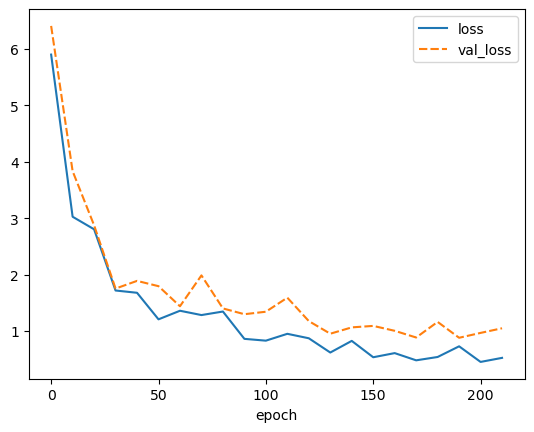

best weights loaded


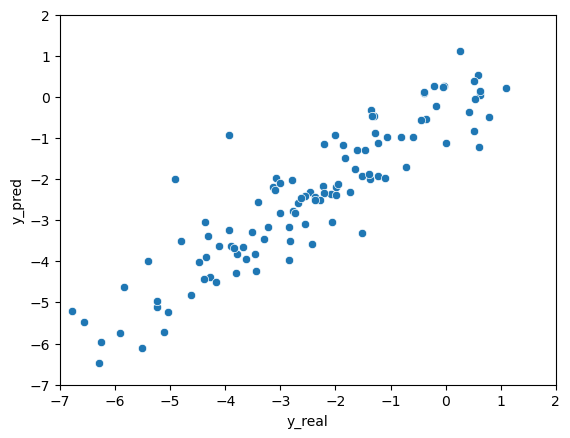

elapsed time: 80.4915931224823
run: 1
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38C1E4C0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7B2A430>, <torch.utils.data.dataset.Subset object at 0x0000021AD7B2A850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.834282366434733 | Validation Loss 6.400827169418335
Epoch 10 | Train Loss 4.563115549087525 | Validation Loss 6.235732793807983
Epoch 20 | Train Loss 4.238597822189331 | Validation Loss 5.370784521102905
Epoch 30 | Train Loss 3.8637441794077554 | Validation Loss 5.812047004699707
Epoch 40 | Train Loss 3.802361249923706 | Validation Loss 4.668339729309082
Epoch 50 | Train Loss 3.878688844045003 | Validation Loss 4.654416561126709
Epoch 60 | Train Loss 3.423658005396525 | Validation Loss 4.7245084047317505
Epoch 70 | Train Loss 3.319982671737671 | Validation Loss 4.524549961090088
Epoch 80 | Train Loss 3.524367014567057 | Validation Loss 4.619776248931885
Epoch 90 | Train Loss 3.104947865009308 | Validation Loss 4.763211488723755
Epoch 100 | Train Loss 3.024075412750244 | Validation Loss 4.1131227016448975
Epoch 110 | Train Loss 3.001458994547526 | Validation Loss 3.673642635345459
Epoch 120 | Train Loss 2.5149976929028828 | Validation Loss 4.295982837677002
Epoch 

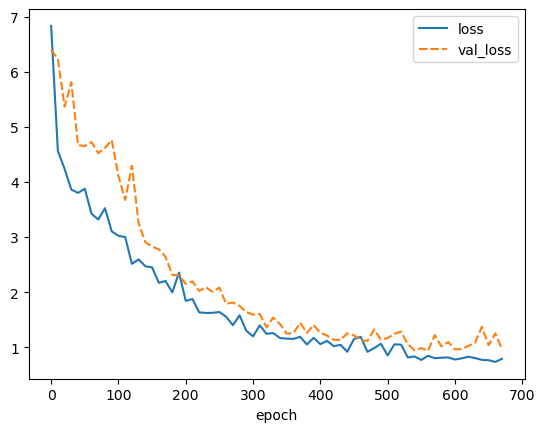

best weights loaded


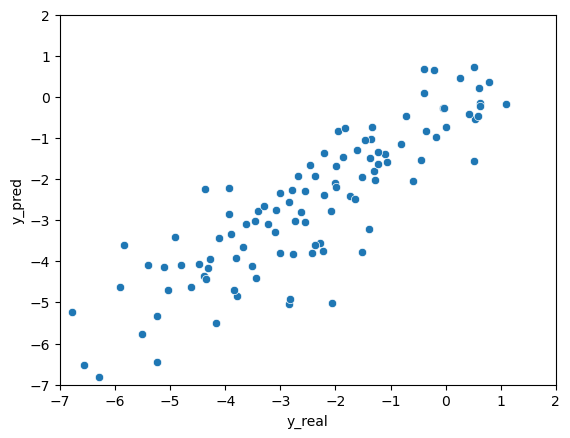

elapsed time: 198.09985494613647
run: 2
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38AD3A00>, <torch.utils.data.dataset.Subset object at 0x0000021A38B50DC0>, <torch.utils.data.dataset.Subset object at 0x0000021A38C615E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.979366938273112 | Validation Loss 5.498411417007446
Epoch 10 | Train Loss 3.914742199579875 | Validation Loss 5.0377349853515625
Epoch 20 | Train Loss 3.8671978155771893 | Validation Loss 4.425942897796631
Epoch 30 | Train Loss 3.1802425384521484 | Validation Loss 3.765548348426819
Epoch 40 | Train Loss 2.5070913871129354 | Validation Loss 3.1629315614700317
Epoch 50 | Train Loss 2.621474250157674 | Validation Loss 3.2034538984298706
Epoch 60 | Train Loss 2.178615196545919 | Validation Loss 2.6766788363456726
Epoch 70 | Train Loss 1.9183385650316873 | Validation Loss 2.486048460006714
Epoch 80 | Train Loss 2.0235544284184774 | Validation Loss 3.042280077934265
Epoch 90 | Train Loss 2.0603973309199017 | Validation Loss 2.6237528324127197
Epoch 100 | Train Loss 1.8345754543940227 | Validation Loss 1.99678373336792
Epoch 110 | Train Loss 2.23843301932017 | Validation Loss 2.9306609630584717
Epoch 120 | Train Loss 1.5800331830978394 | Validation Loss 1.88026118278503

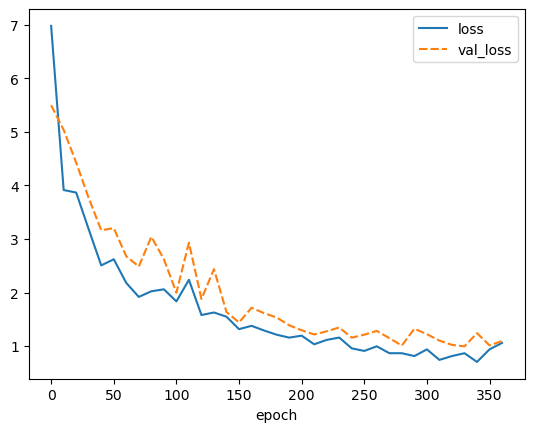

best weights loaded


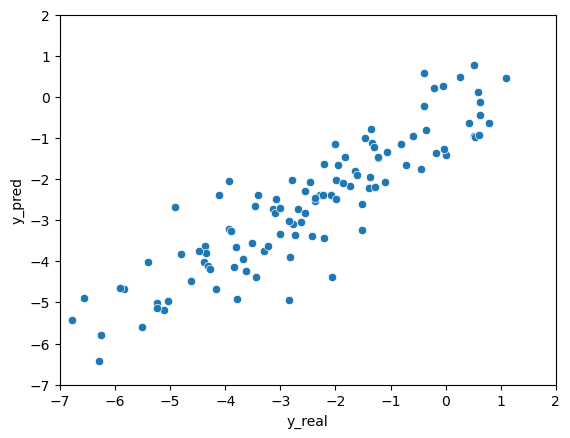

elapsed time: 91.8375518321991
run: 3
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38C435E0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C63D00>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C69250>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.197930224736531 | Validation Loss 5.746589422225952
Epoch 10 | Train Loss 3.5458811283111573 | Validation Loss 4.76400351524353
Epoch 20 | Train Loss 3.2768050034840903 | Validation Loss 3.7840782403945923
Epoch 30 | Train Loss 2.5323505957921344 | Validation Loss 3.2789679765701294
Epoch 40 | Train Loss 2.3835954745610555 | Validation Loss 2.7045482397079468
Epoch 50 | Train Loss 2.013617205619812 | Validation Loss 2.3591219186782837
Epoch 60 | Train Loss 1.7499180396397909 | Validation Loss 2.2457637786865234
Epoch 70 | Train Loss 1.6203615546226502 | Validation Loss 2.2460014820098877
Epoch 80 | Train Loss 2.2360822995503744 | Validation Loss 2.355491042137146
Epoch 90 | Train Loss 1.251164150238037 | Validation Loss 1.6165920495986938
Epoch 100 | Train Loss 1.2477647384007773 | Validation Loss 1.568491280078888
Epoch 110 | Train Loss 1.1419144908587138 | Validation Loss 1.6933863162994385
Epoch 120 | Train Loss 1.3396025538444518 | Validation Loss 1.480020463

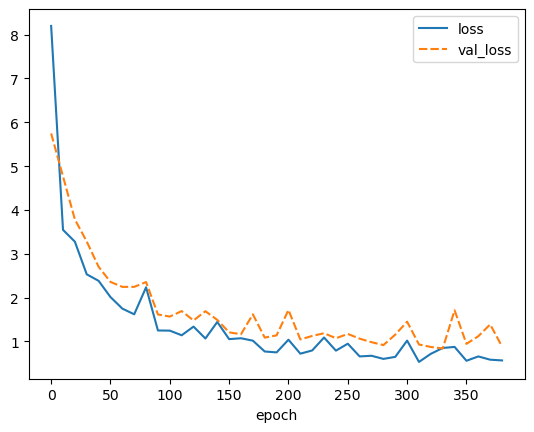

best weights loaded


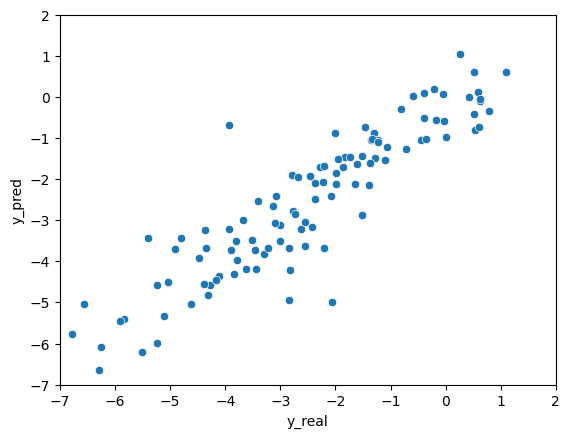

elapsed time: 91.95117497444153
run: 4
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38D16E50>, <torch.utils.data.dataset.Subset object at 0x0000021AD7DAA3A0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7DAA8B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 10.429256852467855 | Validation Loss 6.224766969680786
Epoch 10 | Train Loss 3.471039933959643 | Validation Loss 4.9419450759887695
Epoch 20 | Train Loss 3.898500855763753 | Validation Loss 4.691762208938599
Epoch 30 | Train Loss 3.0103960037231445 | Validation Loss 3.251616597175598
Epoch 40 | Train Loss 2.366728727022807 | Validation Loss 3.719719409942627
Epoch 50 | Train Loss 2.193744444847107 | Validation Loss 2.6586380004882812
Epoch 60 | Train Loss 2.0400346994400023 | Validation Loss 2.1304699182510376
Epoch 70 | Train Loss 1.7527284542719523 | Validation Loss 1.8456063270568848
Epoch 80 | Train Loss 1.8645004351933798 | Validation Loss 2.2396410703659058
Epoch 90 | Train Loss 1.4548555612564087 | Validation Loss 2.58263897895813
Epoch 100 | Train Loss 1.5039618810017903 | Validation Loss 1.7203062772750854
Epoch 110 | Train Loss 1.0503349502881367 | Validation Loss 1.4449535608291626
Epoch 120 | Train Loss 1.2104858756065369 | Validation Loss 2.39742815494

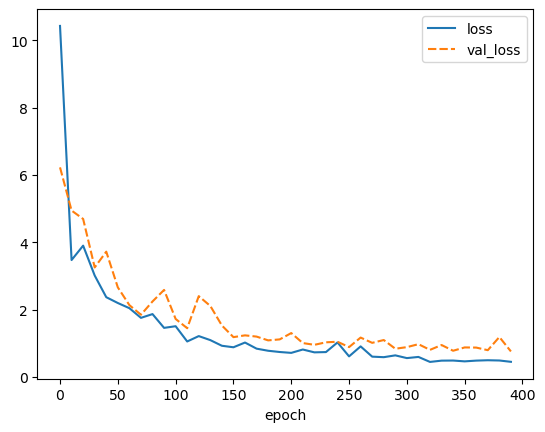

best weights loaded


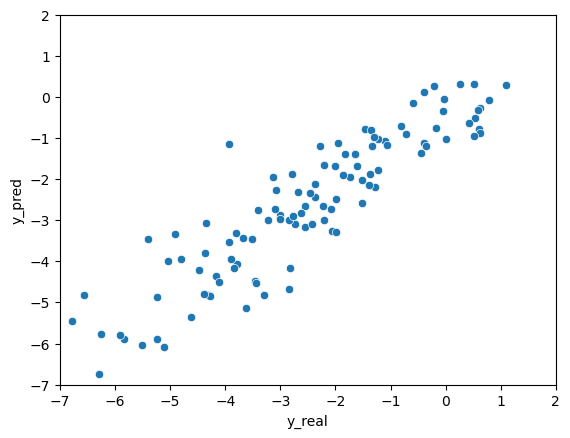

elapsed time: 97.93571829795837
run: 5
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38E63CA0>, <torch.utils.data.dataset.Subset object at 0x0000021A38CFF9D0>, <torch.utils.data.dataset.Subset object at 0x0000021A38CFF670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.044413344065348 | Validation Loss 6.9513161182403564
Epoch 10 | Train Loss 3.2997997601826987 | Validation Loss 4.163821816444397
Epoch 20 | Train Loss 2.753679291407267 | Validation Loss 2.8186798095703125
Epoch 30 | Train Loss 2.11307958761851 | Validation Loss 2.2810035943984985
Epoch 40 | Train Loss 1.6485439896583558 | Validation Loss 1.9131906032562256
Epoch 50 | Train Loss 1.693827486038208 | Validation Loss 1.7185760736465454
Epoch 60 | Train Loss 1.8631895462671915 | Validation Loss 2.1302521228790283
Epoch 70 | Train Loss 1.2189821581045786 | Validation Loss 1.5445876121520996
Epoch 80 | Train Loss 1.4962250590324402 | Validation Loss 1.596937656402588
Epoch 90 | Train Loss 1.16848486661911 | Validation Loss 1.5525535345077515
Epoch 100 | Train Loss 1.6348038514455159 | Validation Loss 1.704060971736908
Epoch 110 | Train Loss 0.9800824324289957 | Validation Loss 1.3240429162979126
Epoch 120 | Train Loss 1.0086046149333319 | Validation Loss 1.20274794101

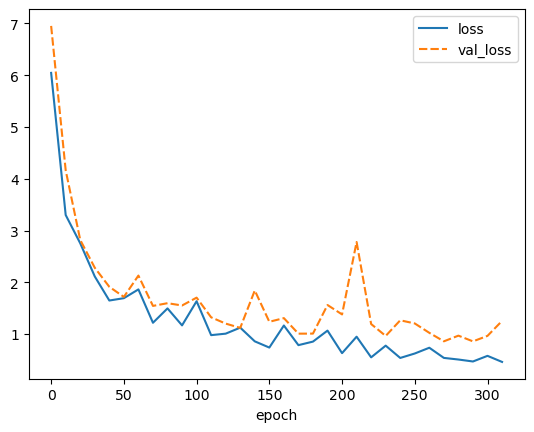

best weights loaded


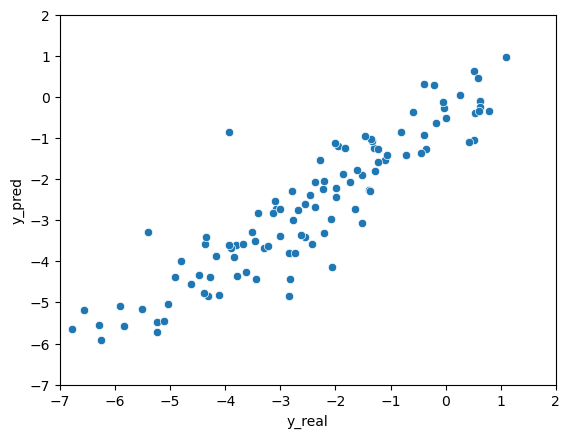

elapsed time: 70.69097256660461
run: 6
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38F141F0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D7C2B0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D7C7C0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.412621895472209 | Validation Loss 5.620818614959717
Epoch 10 | Train Loss 4.31849201520284 | Validation Loss 5.243207693099976
Epoch 20 | Train Loss 4.127491887410482 | Validation Loss 5.167738676071167
Epoch 30 | Train Loss 3.701589663823446 | Validation Loss 5.283176422119141
Epoch 40 | Train Loss 3.566871341069539 | Validation Loss 4.909753322601318
Epoch 50 | Train Loss 3.4812779664993285 | Validation Loss 4.787679433822632
Epoch 60 | Train Loss 3.5140697161356607 | Validation Loss 4.493526935577393
Epoch 70 | Train Loss 3.5748589833577475 | Validation Loss 4.471926689147949
Epoch 80 | Train Loss 3.4650885264078775 | Validation Loss 4.392642498016357
Epoch 90 | Train Loss 3.0583800951639812 | Validation Loss 4.129701852798462
Epoch 100 | Train Loss 3.1181167443593343 | Validation Loss 3.9626965522766113
Epoch 110 | Train Loss 3.190848120053609 | Validation Loss 3.5979535579681396
Epoch 120 | Train Loss 2.7062064170837403 | Validation Loss 3.1854742765426636
E

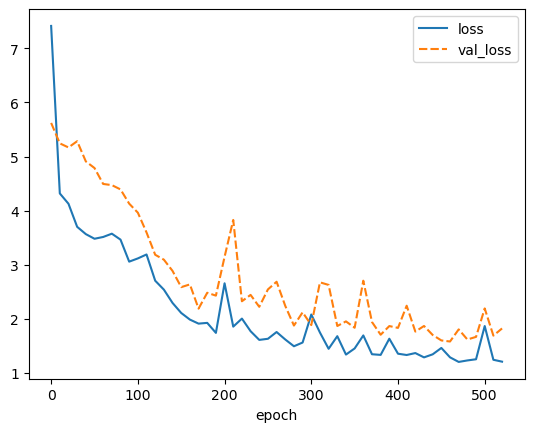

best weights loaded


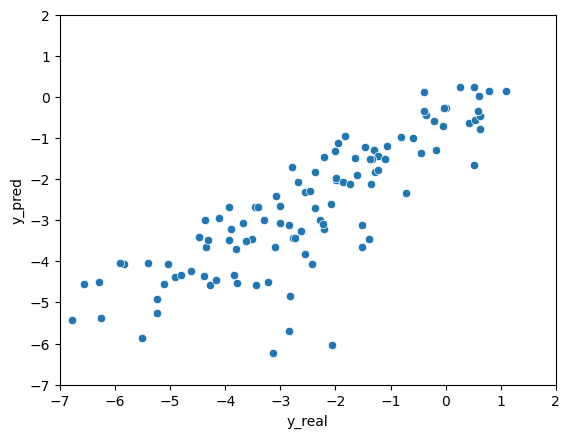

elapsed time: 128.2407021522522
run: 7
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38E8CDC0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7A6B190>, <torch.utils.data.dataset.Subset object at 0x0000021AD7A6B9A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.874899260203043 | Validation Loss 6.022492408752441
Epoch 10 | Train Loss 4.108196973800659 | Validation Loss 5.572427749633789
Epoch 20 | Train Loss 3.9989681402842203 | Validation Loss 5.722214460372925
Epoch 30 | Train Loss 3.6208197116851806 | Validation Loss 4.023920774459839
Epoch 40 | Train Loss 2.7330475568771364 | Validation Loss 3.549349069595337
Epoch 50 | Train Loss 2.370980978012085 | Validation Loss 2.5135053396224976
Epoch 60 | Train Loss 1.9633318106333415 | Validation Loss 2.2916475534439087
Epoch 70 | Train Loss 1.7223791360855103 | Validation Loss 2.3745707273483276
Epoch 80 | Train Loss 1.8409228165944418 | Validation Loss 2.0822861790657043
Epoch 90 | Train Loss 1.5551752964655559 | Validation Loss 2.069963037967682
Epoch 100 | Train Loss 1.6818920850753785 | Validation Loss 2.3419103622436523
Epoch 110 | Train Loss 1.4277800877888998 | Validation Loss 1.9075393080711365
Epoch 120 | Train Loss 1.2505926370620728 | Validation Loss 1.6828347444

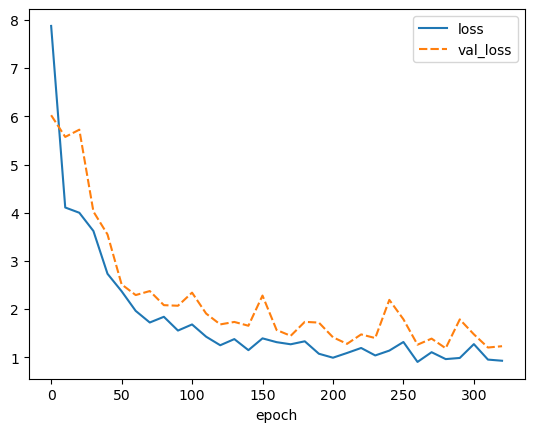

best weights loaded


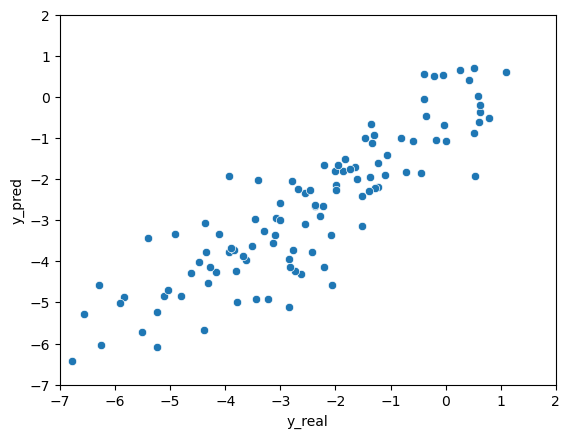

elapsed time: 83.27895951271057
run: 8
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38F67310>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C44850>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C44D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.358924229939778 | Validation Loss 5.823520660400391
Epoch 10 | Train Loss 3.954474417368571 | Validation Loss 4.563504695892334
Epoch 20 | Train Loss 4.053102699915568 | Validation Loss 4.48422384262085
Epoch 30 | Train Loss 2.8610045433044435 | Validation Loss 3.501107096672058
Epoch 40 | Train Loss 2.3974167982737224 | Validation Loss 2.684309959411621
Epoch 50 | Train Loss 1.8628249088923137 | Validation Loss 2.3450769186019897
Epoch 60 | Train Loss 1.9547671794891357 | Validation Loss 1.9950774312019348
Epoch 70 | Train Loss 1.4436979134877523 | Validation Loss 2.230575919151306
Epoch 80 | Train Loss 1.4115167379379272 | Validation Loss 1.802150011062622
Epoch 90 | Train Loss 1.407198977470398 | Validation Loss 2.149009943008423
Epoch 100 | Train Loss 1.3211356321970622 | Validation Loss 2.3971078395843506
Epoch 110 | Train Loss 1.369630757967631 | Validation Loss 1.4941701889038086
Epoch 120 | Train Loss 1.2428306142489116 | Validation Loss 1.656928062438964

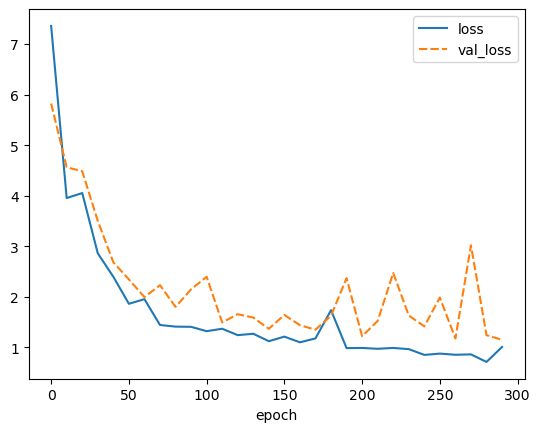

best weights loaded


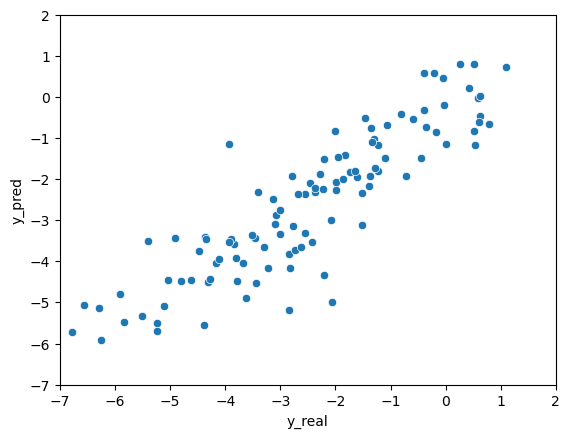

elapsed time: 78.9971570968628
run: 9
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A39FBEAC0>, <torch.utils.data.dataset.Subset object at 0x0000021AD66951F0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7B5EAF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 12.075015672047932 | Validation Loss 9.574633359909058
Epoch 10 | Train Loss 3.880219268798828 | Validation Loss 4.933114051818848
Epoch 20 | Train Loss 3.737881620724996 | Validation Loss 4.9003777503967285
Epoch 30 | Train Loss 3.4279930035273236 | Validation Loss 4.664707899093628
Epoch 40 | Train Loss 2.909761317571004 | Validation Loss 4.015731930732727
Epoch 50 | Train Loss 2.452507734298706 | Validation Loss 3.0277132987976074
Epoch 60 | Train Loss 2.0443420012791953 | Validation Loss 2.439038038253784
Epoch 70 | Train Loss 1.8115394512812297 | Validation Loss 2.0997433066368103
Epoch 80 | Train Loss 1.7513872067133585 | Validation Loss 1.9023200869560242
Epoch 90 | Train Loss 1.7176708539326986 | Validation Loss 2.3577178716659546
Epoch 100 | Train Loss 1.6038239320119223 | Validation Loss 1.8920273780822754
Epoch 110 | Train Loss 1.3916662991046906 | Validation Loss 1.9160823822021484
Epoch 120 | Train Loss 1.3041595101356507 | Validation Loss 1.5973204970

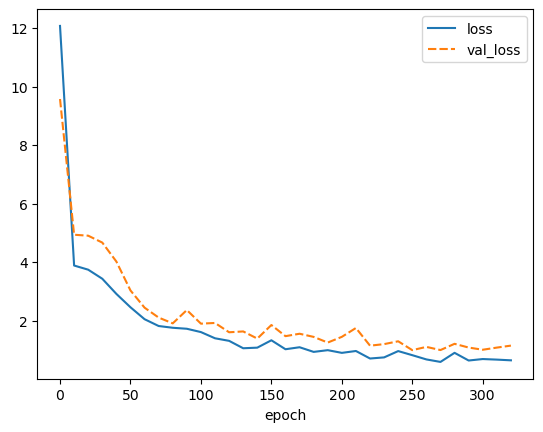

best weights loaded


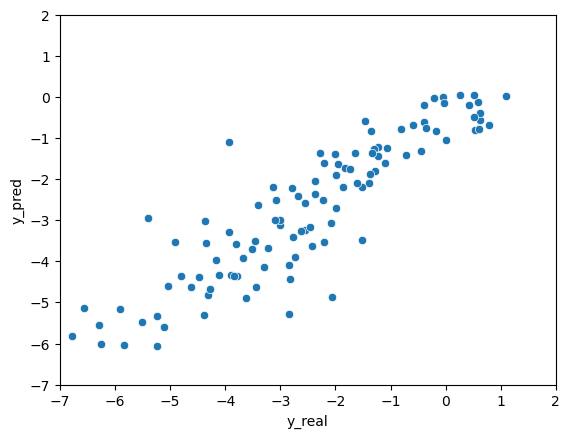

elapsed time: 80.95119166374207
run: 10
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A0C3460>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CBA850>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CBAD60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.044134799639384 | Validation Loss 6.472170352935791
Epoch 10 | Train Loss 2.9167871554692586 | Validation Loss 4.237138032913208
Epoch 20 | Train Loss 2.4352976083755493 | Validation Loss 3.168936610221863
Epoch 30 | Train Loss 2.0917396386464437 | Validation Loss 2.23121440410614
Epoch 40 | Train Loss 1.5958202521006266 | Validation Loss 1.8269679546356201
Epoch 50 | Train Loss 1.4301854689915976 | Validation Loss 1.832383155822754
Epoch 60 | Train Loss 1.286529501279195 | Validation Loss 1.9511724710464478
Epoch 70 | Train Loss 1.1127434730529786 | Validation Loss 1.4804893732070923
Epoch 80 | Train Loss 1.2080743789672852 | Validation Loss 1.6031042337417603
Epoch 90 | Train Loss 1.2254453619321188 | Validation Loss 1.4900352656841278
Epoch 100 | Train Loss 1.0263011813163758 | Validation Loss 1.6585875749588013
Epoch 110 | Train Loss 0.7973958333333333 | Validation Loss 1.1828831434249878
Epoch 120 | Train Loss 0.8017776866753896 | Validation Loss 1.276681065

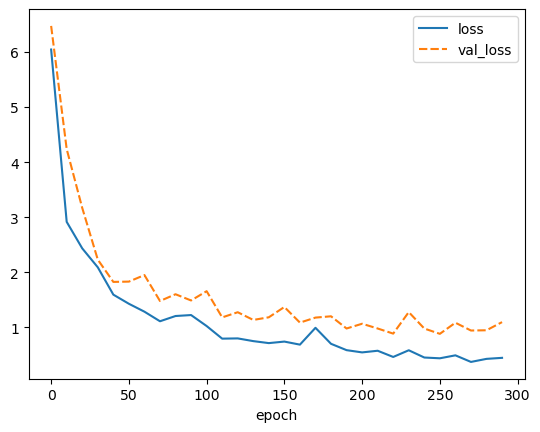

best weights loaded


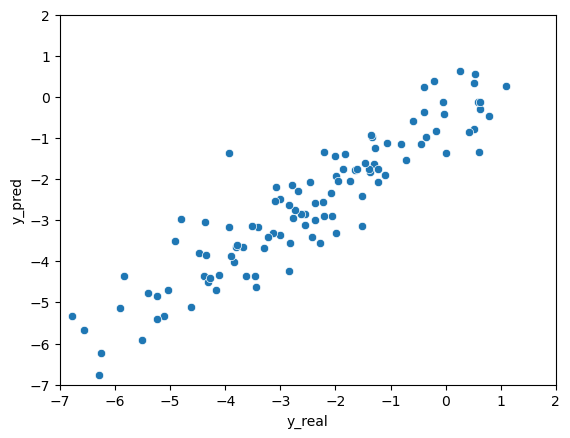

elapsed time: 67.74815058708191
run: 11
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A070B80>, <torch.utils.data.dataset.Subset object at 0x0000021A38B71F10>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D676A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.558282581965129 | Validation Loss 5.39223051071167
Epoch 10 | Train Loss 4.347929573059082 | Validation Loss 5.652028322219849
Epoch 20 | Train Loss 4.215602827072144 | Validation Loss 5.829106569290161
Epoch 30 | Train Loss 3.698666063944499 | Validation Loss 5.187227010726929
Epoch 40 | Train Loss 3.599998712539673 | Validation Loss 4.7603535652160645
Epoch 50 | Train Loss 3.474028221766154 | Validation Loss 5.02007269859314
Epoch 60 | Train Loss 3.430626726150513 | Validation Loss 4.497621297836304
Epoch 70 | Train Loss 3.3553332328796386 | Validation Loss 4.2886658906936646
Epoch 80 | Train Loss 3.537538528442383 | Validation Loss 4.4415459632873535
Epoch 90 | Train Loss 3.237017869949341 | Validation Loss 4.19471001625061
Epoch 100 | Train Loss 3.0177834272384643 | Validation Loss 4.183135509490967
Epoch 110 | Train Loss 2.958191712697347 | Validation Loss 3.814802050590515
Epoch 120 | Train Loss 3.0673213799794516 | Validation Loss 3.794385552406311
Epoch 1

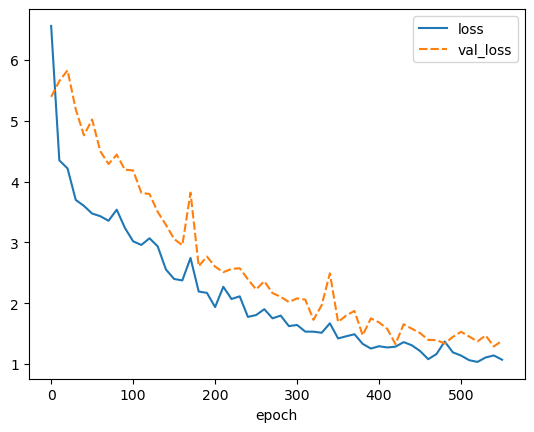

best weights loaded


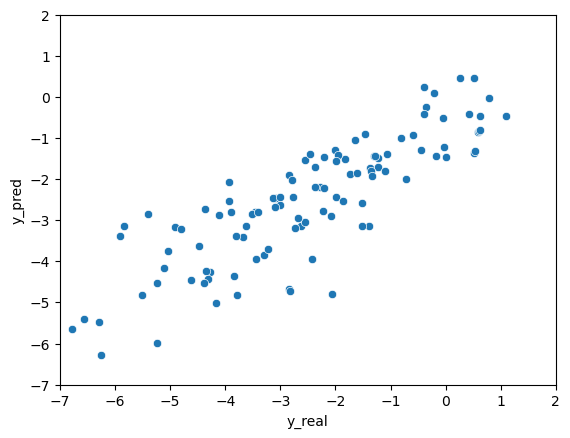

elapsed time: 139.50719833374023
run: 12
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD780F640>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CBC160>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CBC670>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.475346469879151 | Validation Loss 5.535896062850952
Epoch 10 | Train Loss 4.053172143300374 | Validation Loss 5.2830164432525635
Epoch 20 | Train Loss 3.823297627766927 | Validation Loss 4.499539613723755
Epoch 30 | Train Loss 2.792753982543945 | Validation Loss 3.492603898048401
Epoch 40 | Train Loss 2.5264243920644125 | Validation Loss 3.046576499938965
Epoch 50 | Train Loss 2.4113753914833067 | Validation Loss 4.242316365242004
Epoch 60 | Train Loss 2.3807087659835817 | Validation Loss 3.076311469078064
Epoch 70 | Train Loss 2.6178755601247152 | Validation Loss 2.8367903232574463
Epoch 80 | Train Loss 2.211901148160299 | Validation Loss 3.2916704416275024
Epoch 90 | Train Loss 1.8494473814964294 | Validation Loss 2.4322479963302612
Epoch 100 | Train Loss 2.1534826437632244 | Validation Loss 2.811351180076599
Epoch 110 | Train Loss 1.696552280584971 | Validation Loss 2.136896252632141
Epoch 120 | Train Loss 1.787359110514323 | Validation Loss 1.996001422405243


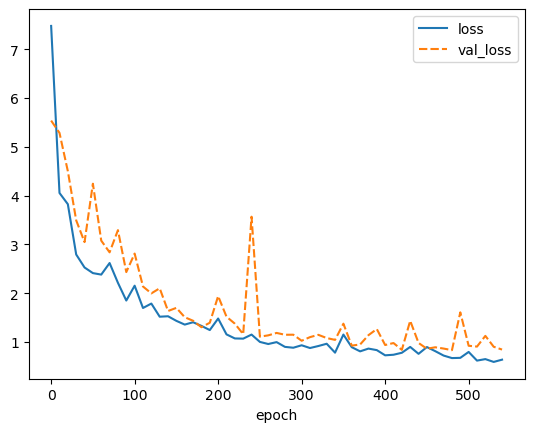

best weights loaded


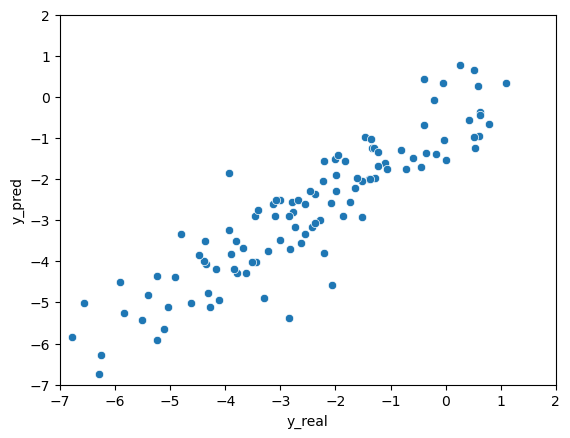

elapsed time: 134.37233448028564
run: 13
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7834280>, <torch.utils.data.dataset.Subset object at 0x0000021A38C71550>, <torch.utils.data.dataset.Subset object at 0x0000021A38C716A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.07930916150411 | Validation Loss 5.761216640472412
Epoch 10 | Train Loss 3.6972732067108156 | Validation Loss 4.4846144914627075
Epoch 20 | Train Loss 3.0584036191304524 | Validation Loss 3.5509684085845947
Epoch 30 | Train Loss 2.378735689322154 | Validation Loss 3.2245864272117615
Epoch 40 | Train Loss 2.3464131355285645 | Validation Loss 2.6606916189193726
Epoch 50 | Train Loss 1.9287576039632162 | Validation Loss 2.323021411895752
Epoch 60 | Train Loss 2.174445645014445 | Validation Loss 2.124889850616455
Epoch 70 | Train Loss 1.5351355612277984 | Validation Loss 2.2554434537887573
Epoch 80 | Train Loss 1.8457656065622965 | Validation Loss 1.9849162101745605
Epoch 90 | Train Loss 1.4688078045845032 | Validation Loss 1.9761760830879211
Epoch 100 | Train Loss 1.8791261037190756 | Validation Loss 2.0317323207855225
Epoch 110 | Train Loss 1.280957325299581 | Validation Loss 1.4635670185089111
Epoch 120 | Train Loss 1.4319095055262248 | Validation Loss 1.994445621

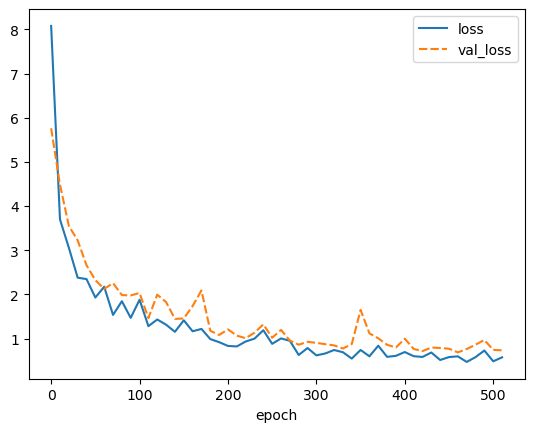

best weights loaded


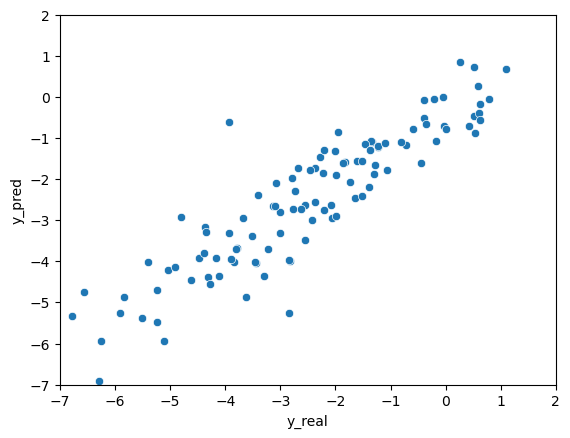

elapsed time: 125.08187747001648
run: 14
{'hidden_channels_list': [256], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A0A0D30>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BCA460>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BCA970>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 12.101211484273275 | Validation Loss 10.904929637908936
Epoch 10 | Train Loss 3.854076063632965 | Validation Loss 4.989059686660767
Epoch 20 | Train Loss 3.4946826775868733 | Validation Loss 4.79066014289856
Epoch 30 | Train Loss 3.117077843348185 | Validation Loss 3.89158034324646
Epoch 40 | Train Loss 2.601431369781494 | Validation Loss 3.0136531591415405
Epoch 50 | Train Loss 2.7650347630182903 | Validation Loss 3.603092908859253
Epoch 60 | Train Loss 2.244733754793803 | Validation Loss 2.3339128494262695
Epoch 70 | Train Loss 1.8978170871734619 | Validation Loss 2.1951569318771362
Epoch 80 | Train Loss 1.800975545247396 | Validation Loss 2.162173867225647
Epoch 90 | Train Loss 1.6627008438110351 | Validation Loss 1.908572793006897
Epoch 100 | Train Loss 1.3769822080930074 | Validation Loss 1.8835393190383911
Epoch 110 | Train Loss 1.274370801448822 | Validation Loss 1.570047676563263
Epoch 120 | Train Loss 1.5684702237447103 | Validation Loss 2.0412907004356384

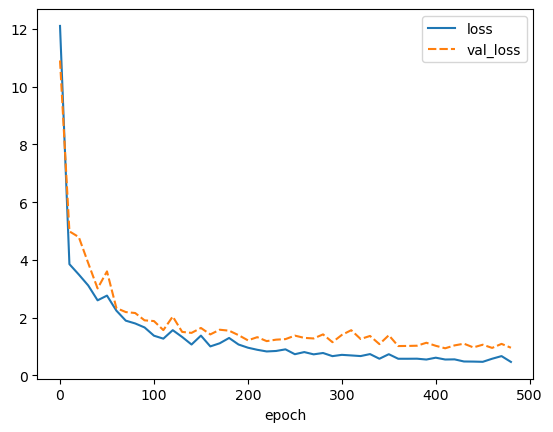

best weights loaded


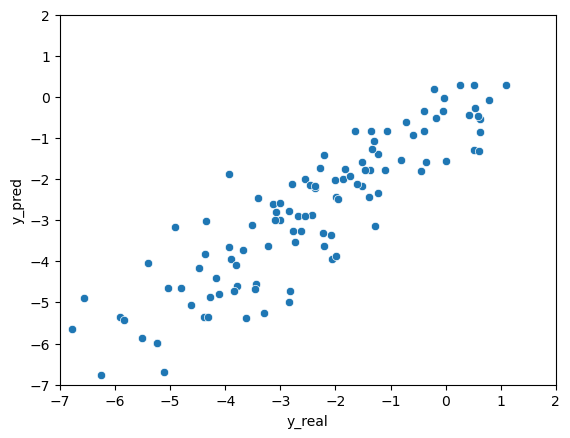

elapsed time: 121.03388810157776
run: 15
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD78D99D0>, <torch.utils.data.dataset.Subset object at 0x0000021A3A076BB0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7957AC0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.050532436370849 | Validation Loss 5.973942279815674
Epoch 10 | Train Loss 3.1416828711827596 | Validation Loss 3.8728095293045044
Epoch 20 | Train Loss 2.0738977193832397 | Validation Loss 2.7570884823799133
Epoch 30 | Train Loss 1.9403395255406697 | Validation Loss 2.4167189598083496
Epoch 40 | Train Loss 1.5189378301302592 | Validation Loss 2.5084710121154785
Epoch 50 | Train Loss 1.4751553694407145 | Validation Loss 2.032159388065338
Epoch 60 | Train Loss 1.2170329809188842 | Validation Loss 1.3511682748794556
Epoch 70 | Train Loss 0.9440087348222732 | Validation Loss 1.2753255367279053
Epoch 80 | Train Loss 1.1994668960571289 | Validation Loss 1.971163809299469
Epoch 90 | Train Loss 0.9637516379356384 | Validation Loss 1.6371157765388489
Epoch 100 | Train Loss 0.7235704839229584 | Validation Loss 1.42921781539917
Epoch 110 | Train Loss 0.6880328973134359 | Validation Loss 1.1624142527580261
Epoch 120 | Train Loss 0.6741249024868011 | Validation Loss 1.3011423

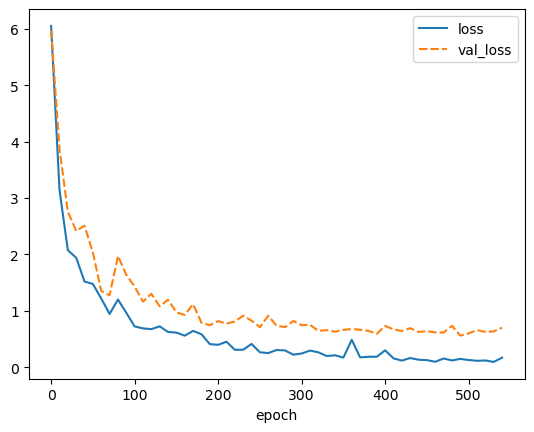

best weights loaded


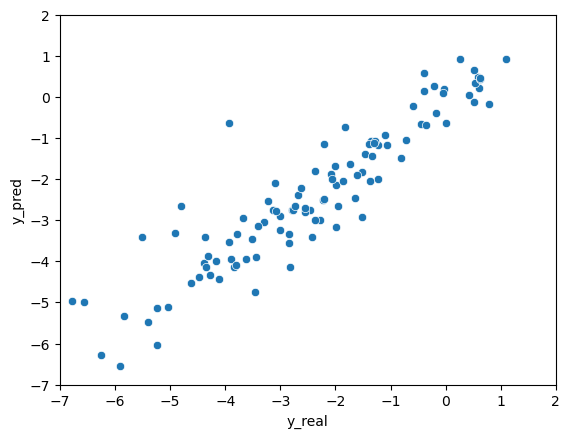

elapsed time: 134.4329969882965
run: 16
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38D75640>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CD0040>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CD05E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.10997625986735 | Validation Loss 6.273334503173828
Epoch 10 | Train Loss 4.457623052597046 | Validation Loss 5.337984323501587
Epoch 20 | Train Loss 3.9282681465148928 | Validation Loss 5.3849663734436035
Epoch 30 | Train Loss 3.7198442935943605 | Validation Loss 4.946459531784058
Epoch 40 | Train Loss 3.5505707899729413 | Validation Loss 4.743644714355469
Epoch 50 | Train Loss 3.4579130172729493 | Validation Loss 4.591675281524658
Epoch 60 | Train Loss 3.554831043879191 | Validation Loss 4.7987635135650635
Epoch 70 | Train Loss 3.2675058682759603 | Validation Loss 4.927845120429993
Epoch 80 | Train Loss 3.566405948003133 | Validation Loss 4.335049629211426
Epoch 90 | Train Loss 3.1245094617207845 | Validation Loss 4.508646011352539
Epoch 100 | Train Loss 2.9058509270350137 | Validation Loss 4.545859694480896
Epoch 110 | Train Loss 2.747174692153931 | Validation Loss 4.02207612991333
Epoch 120 | Train Loss 3.0220633506774903 | Validation Loss 3.233001232147217
Ep

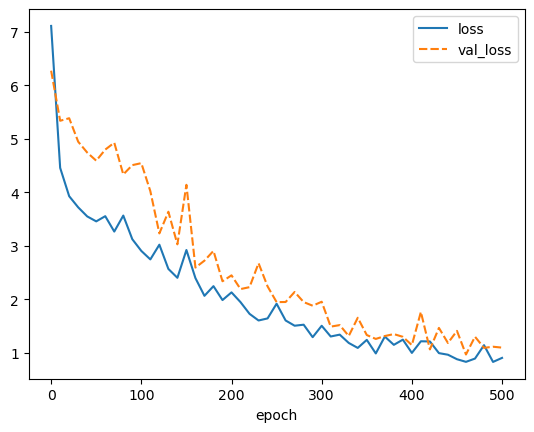

best weights loaded


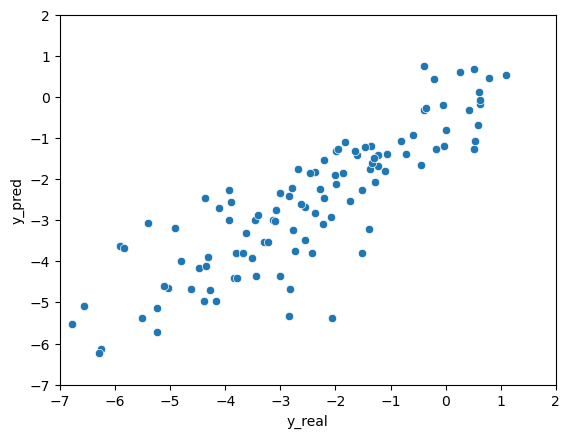

elapsed time: 180.74592995643616
run: 17
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38F38820>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D1D550>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D1D790>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.6346192518870035 | Validation Loss 5.4889867305755615
Epoch 10 | Train Loss 3.6582343419392904 | Validation Loss 4.784116268157959
Epoch 20 | Train Loss 3.599795389175415 | Validation Loss 4.508937835693359
Epoch 30 | Train Loss 3.2964271545410155 | Validation Loss 4.491451621055603
Epoch 40 | Train Loss 2.890550478299459 | Validation Loss 4.353742003440857
Epoch 50 | Train Loss 2.4014801422754926 | Validation Loss 3.1946038007736206
Epoch 60 | Train Loss 2.4148771206537885 | Validation Loss 2.877393960952759
Epoch 70 | Train Loss 2.130646562576294 | Validation Loss 2.7283130884170532
Epoch 80 | Train Loss 1.8884420156478883 | Validation Loss 3.171844720840454
Epoch 90 | Train Loss 1.9255277236302695 | Validation Loss 2.4307111501693726
Epoch 100 | Train Loss 1.8553721984227498 | Validation Loss 2.145921528339386
Epoch 110 | Train Loss 1.495143719514211 | Validation Loss 2.011368453502655
Epoch 120 | Train Loss 1.3721295436223349 | Validation Loss 1.6776088476181

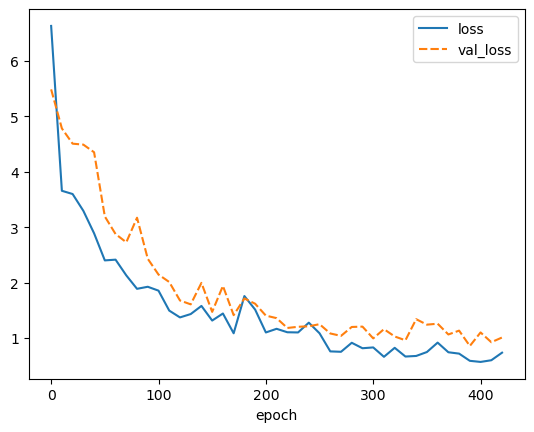

best weights loaded


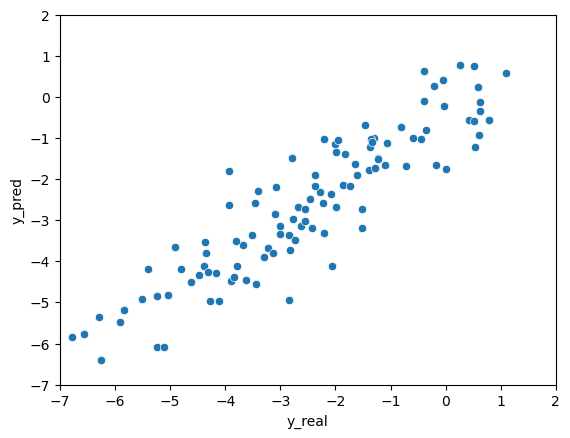

elapsed time: 142.98108100891113
run: 18
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38CCEA00>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C1FE20>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C1FBB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.841934935251872 | Validation Loss 5.622252941131592
Epoch 10 | Train Loss 4.049115928014119 | Validation Loss 4.869584798812866
Epoch 20 | Train Loss 3.3931832472483316 | Validation Loss 4.694373250007629
Epoch 30 | Train Loss 3.0988699118296306 | Validation Loss 3.981646418571472
Epoch 40 | Train Loss 2.4720335563023883 | Validation Loss 2.8350651264190674
Epoch 50 | Train Loss 2.030538249015808 | Validation Loss 2.7804702520370483
Epoch 60 | Train Loss 1.6284474929173787 | Validation Loss 2.996630072593689
Epoch 70 | Train Loss 1.8799814065297444 | Validation Loss 2.616488218307495
Epoch 80 | Train Loss 1.649623203277588 | Validation Loss 2.9837833642959595
Epoch 90 | Train Loss 1.8963743766148886 | Validation Loss 2.1008107662200928
Epoch 100 | Train Loss 1.3831379691759744 | Validation Loss 1.879288136959076
Epoch 110 | Train Loss 1.2479253888130188 | Validation Loss 1.5593231320381165
Epoch 120 | Train Loss 1.5819321393966674 | Validation Loss 2.036543071269

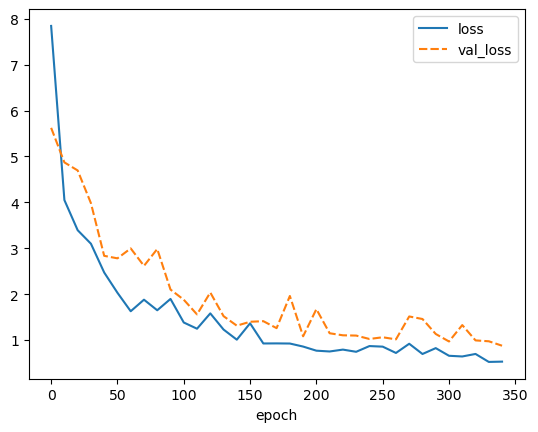

best weights loaded


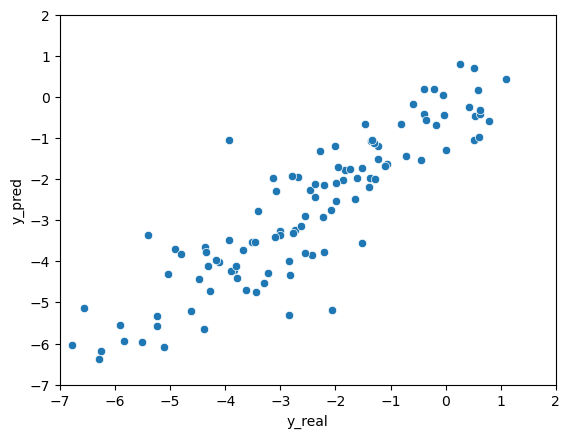

elapsed time: 112.15062665939331
run: 19
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38CBE8B0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7E34250>, <torch.utils.data.dataset.Subset object at 0x0000021AD7E34760>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  200449


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.173786481221518 | Validation Loss 9.2234525680542
Epoch 10 | Train Loss 4.298878955841064 | Validation Loss 5.056445598602295
Epoch 20 | Train Loss 3.501366949081421 | Validation Loss 4.286837458610535
Epoch 30 | Train Loss 2.8075646003087362 | Validation Loss 3.9402916431427
Epoch 40 | Train Loss 2.328141729036967 | Validation Loss 2.7238998413085938
Epoch 50 | Train Loss 1.9278281927108765 | Validation Loss 2.173453152179718
Epoch 60 | Train Loss 1.9064966281255087 | Validation Loss 2.2698971033096313
Epoch 70 | Train Loss 1.5817441622416177 | Validation Loss 2.1937124729156494
Epoch 80 | Train Loss 1.4150227983792623 | Validation Loss 1.6865578889846802
Epoch 90 | Train Loss 1.362575884660085 | Validation Loss 1.6277706623077393
Epoch 100 | Train Loss 1.1593128363291423 | Validation Loss 1.5171932578086853
Epoch 110 | Train Loss 1.3259398857752482 | Validation Loss 1.661553144454956
Epoch 120 | Train Loss 1.0102087616920472 | Validation Loss 1.5947158336639404

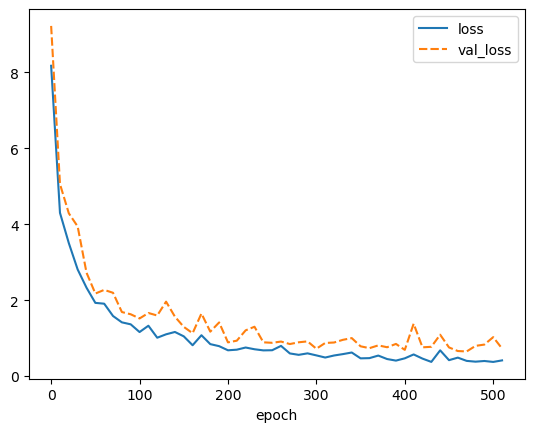

best weights loaded


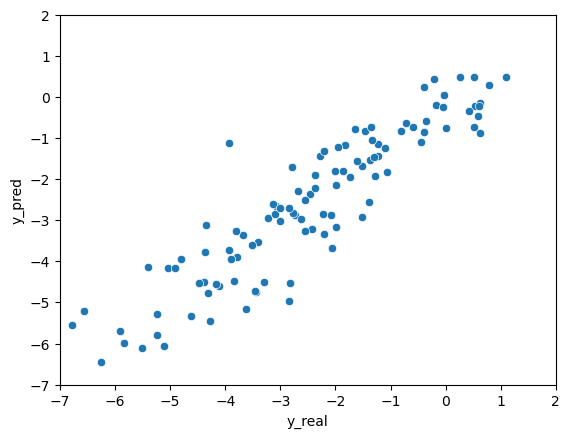

elapsed time: 165.6333246231079
run: 20
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38EF3BE0>, <torch.utils.data.dataset.Subset object at 0x0000021AD791EA60>, <torch.utils.data.dataset.Subset object at 0x0000021AD791E520>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.6528199195861815 | Validation Loss 6.906479358673096
Epoch 10 | Train Loss 3.5070581436157227 | Validation Loss 4.722660303115845
Epoch 20 | Train Loss 3.0722056070963544 | Validation Loss 3.793463706970215
Epoch 30 | Train Loss 2.803272342681885 | Validation Loss 3.1699650287628174
Epoch 40 | Train Loss 1.8877079010009765 | Validation Loss 2.1591943502426147
Epoch 50 | Train Loss 1.6276498715082803 | Validation Loss 2.000761389732361
Epoch 60 | Train Loss 1.8147191127141318 | Validation Loss 2.288128674030304
Epoch 70 | Train Loss 1.5750579595565797 | Validation Loss 2.1400409936904907
Epoch 80 | Train Loss 1.5596402764320374 | Validation Loss 3.0660622119903564
Epoch 90 | Train Loss 1.1532065351804097 | Validation Loss 1.546872079372406
Epoch 100 | Train Loss 1.185504714647929 | Validation Loss 2.08621346950531
Epoch 110 | Train Loss 1.136607007185618 | Validation Loss 1.3594067096710205
Epoch 120 | Train Loss 1.3821425040562947 | Validation Loss 1.529779195785

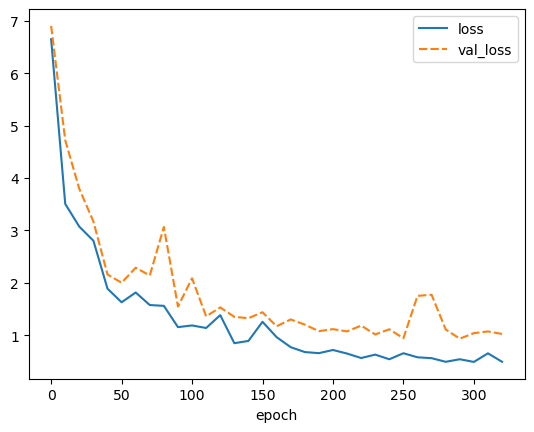

best weights loaded


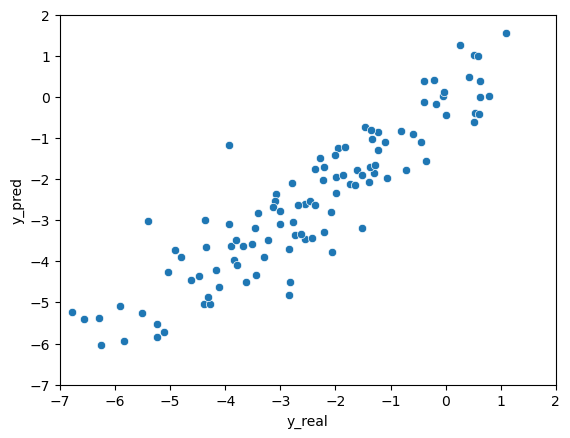

elapsed time: 100.88517761230469
run: 21
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7A8FEB0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BE2940>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BE2E50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.014719994862874 | Validation Loss 5.984409809112549
Epoch 10 | Train Loss 4.564019250869751 | Validation Loss 5.4063578844070435
Epoch 20 | Train Loss 4.119055779774984 | Validation Loss 5.741008758544922
Epoch 30 | Train Loss 3.8296670436859133 | Validation Loss 4.78424072265625
Epoch 40 | Train Loss 3.631742572784424 | Validation Loss 5.094846248626709
Epoch 50 | Train Loss 3.77589955329895 | Validation Loss 4.643970012664795
Epoch 60 | Train Loss 3.854825719197591 | Validation Loss 4.7925965785980225
Epoch 70 | Train Loss 3.44409122467041 | Validation Loss 4.693153142929077
Epoch 80 | Train Loss 3.541884406407674 | Validation Loss 4.7743239402771
Epoch 90 | Train Loss 3.4830242156982423 | Validation Loss 4.2951979637146
Epoch 100 | Train Loss 3.1572362581888833 | Validation Loss 3.96526300907135
Epoch 110 | Train Loss 2.9829888264338176 | Validation Loss 4.5473774671554565
Epoch 120 | Train Loss 2.768689250946045 | Validation Loss 3.620805501937866
Epoch 130 |

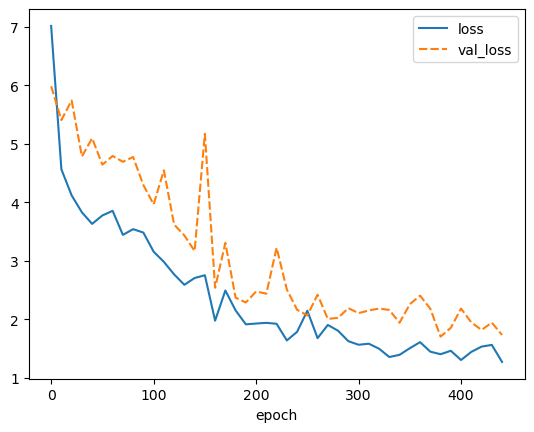

best weights loaded


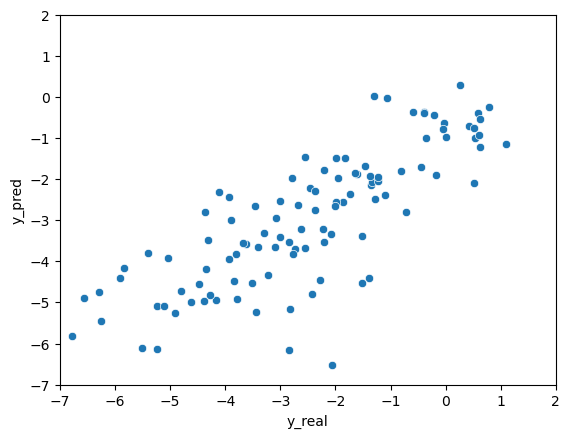

elapsed time: 153.46499514579773
run: 22
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD79DC9A0>, <torch.utils.data.dataset.Subset object at 0x0000021A718166D0>, <torch.utils.data.dataset.Subset object at 0x0000021A718168B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.366101121902465 | Validation Loss 6.152691841125488
Epoch 10 | Train Loss 3.927214002609253 | Validation Loss 5.1955578327178955
Epoch 20 | Train Loss 3.4880258401234943 | Validation Loss 5.407000780105591
Epoch 30 | Train Loss 3.496585512161255 | Validation Loss 4.401998162269592
Epoch 40 | Train Loss 2.9529767433802285 | Validation Loss 4.244912266731262
Epoch 50 | Train Loss 2.480747866630554 | Validation Loss 3.006162166595459
Epoch 60 | Train Loss 2.5111650228500366 | Validation Loss 2.560042381286621
Epoch 70 | Train Loss 1.7025046984354655 | Validation Loss 2.257574200630188
Epoch 80 | Train Loss 1.672342836856842 | Validation Loss 2.118026852607727
Epoch 90 | Train Loss 1.9434673269589742 | Validation Loss 1.9222036004066467
Epoch 100 | Train Loss 1.651322841644287 | Validation Loss 2.26427161693573
Epoch 110 | Train Loss 1.6220201094945272 | Validation Loss 1.7557281255722046
Epoch 120 | Train Loss 1.3546558618545532 | Validation Loss 1.7102221250534058


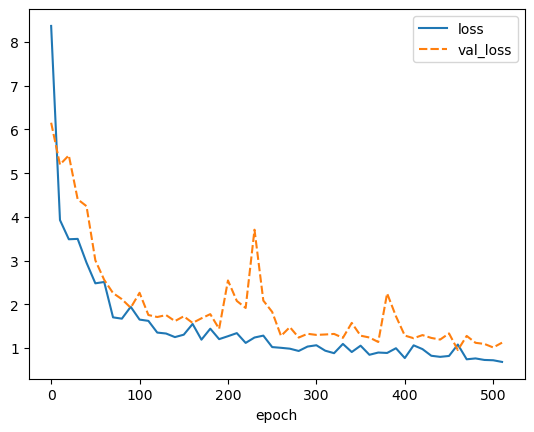

best weights loaded


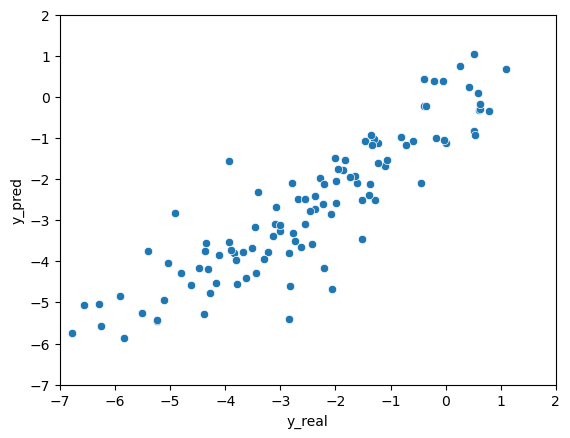

elapsed time: 180.48535895347595
run: 23
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7892670>, <torch.utils.data.dataset.Subset object at 0x0000021AD7DE0190>, <torch.utils.data.dataset.Subset object at 0x0000021AD7DE06A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.513169240951537 | Validation Loss 6.287917137145996
Epoch 10 | Train Loss 3.8494138081868488 | Validation Loss 4.67667818069458
Epoch 20 | Train Loss 3.3576075553894045 | Validation Loss 4.007915496826172
Epoch 30 | Train Loss 2.4734392007191977 | Validation Loss 2.904650032520294
Epoch 40 | Train Loss 2.0635040362675983 | Validation Loss 2.781004548072815
Epoch 50 | Train Loss 1.8500491817792257 | Validation Loss 1.9250450730323792
Epoch 60 | Train Loss 1.7955248037974039 | Validation Loss 1.9193851351737976
Epoch 70 | Train Loss 1.461462926864624 | Validation Loss 1.8440300226211548
Epoch 80 | Train Loss 1.4168819824854533 | Validation Loss 1.9224346280097961
Epoch 90 | Train Loss 1.3866203784942628 | Validation Loss 1.570882797241211
Epoch 100 | Train Loss 1.3208326935768127 | Validation Loss 2.4036744832992554
Epoch 110 | Train Loss 1.1929500818252563 | Validation Loss 1.496864378452301
Epoch 120 | Train Loss 1.0424235463142395 | Validation Loss 1.61361974477

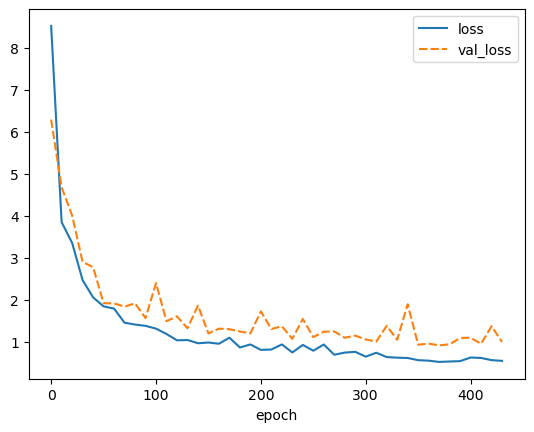

best weights loaded


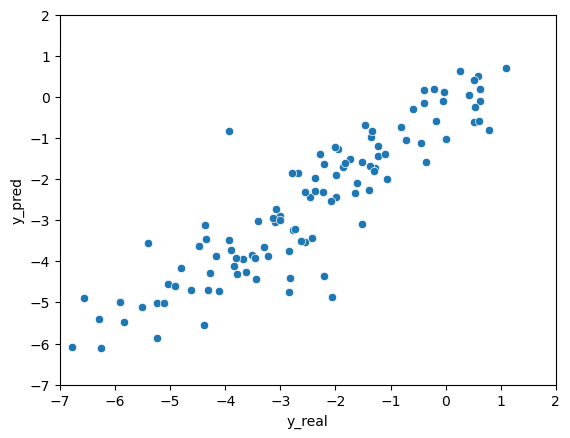

elapsed time: 133.63297414779663
run: 24
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7827FD0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D991C0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D99CD0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 10.361116727193197 | Validation Loss 6.983978271484375
Epoch 10 | Train Loss 4.201188309987386 | Validation Loss 5.0095908641815186
Epoch 20 | Train Loss 3.667298952738444 | Validation Loss 4.755502700805664
Epoch 30 | Train Loss 3.20434365272522 | Validation Loss 3.492615818977356
Epoch 40 | Train Loss 2.6462729295094807 | Validation Loss 2.8979098796844482
Epoch 50 | Train Loss 2.487108508745829 | Validation Loss 2.728618621826172
Epoch 60 | Train Loss 2.0992056210835774 | Validation Loss 2.287572205066681
Epoch 70 | Train Loss 2.1431389331817625 | Validation Loss 5.008480072021484
Epoch 80 | Train Loss 1.7505456368128458 | Validation Loss 2.3686030507087708
Epoch 90 | Train Loss 1.7783030589421591 | Validation Loss 1.8654847145080566
Epoch 100 | Train Loss 1.4261922597885133 | Validation Loss 2.1752864718437195
Epoch 110 | Train Loss 1.4170315464337666 | Validation Loss 1.821144461631775
Epoch 120 | Train Loss 1.0840512037277221 | Validation Loss 1.5523941516876

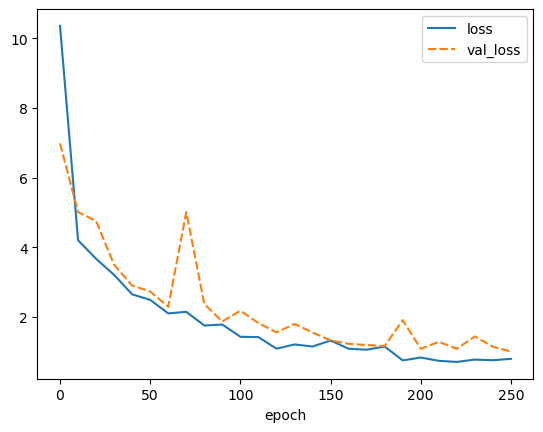

best weights loaded


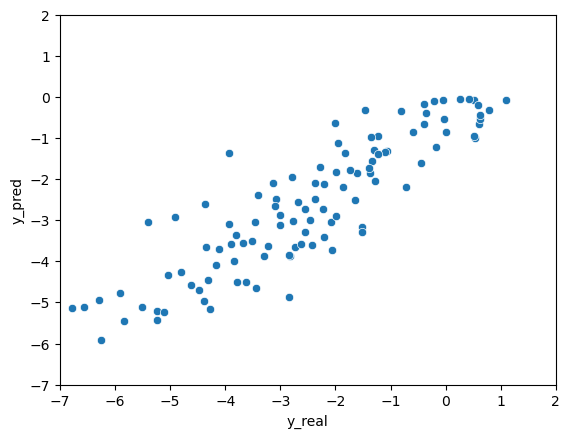

elapsed time: 75.17514967918396
run: 25
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38F31A30>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D27070>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D27580>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.506447331110636 | Validation Loss 5.817346811294556
Epoch 10 | Train Loss 2.664111550649007 | Validation Loss 3.464386820793152
Epoch 20 | Train Loss 2.37634170850118 | Validation Loss 2.745908260345459
Epoch 30 | Train Loss 1.8995226542154948 | Validation Loss 2.015592575073242
Epoch 40 | Train Loss 1.829391566912333 | Validation Loss 2.597825765609741
Epoch 50 | Train Loss 1.45197590192159 | Validation Loss 1.620940089225769
Epoch 60 | Train Loss 1.2761415640513103 | Validation Loss 1.7018084526062012
Epoch 70 | Train Loss 1.2062004446983337 | Validation Loss 1.6636013984680176
Epoch 80 | Train Loss 1.229593324661255 | Validation Loss 1.3852940201759338
Epoch 90 | Train Loss 0.9383882323900858 | Validation Loss 1.3614202737808228
Epoch 100 | Train Loss 0.953778878847758 | Validation Loss 1.5528581738471985
Epoch 110 | Train Loss 0.8068738679091135 | Validation Loss 1.141600251197815
Epoch 120 | Train Loss 1.08787309328715 | Validation Loss 1.3175933361053467
Ep

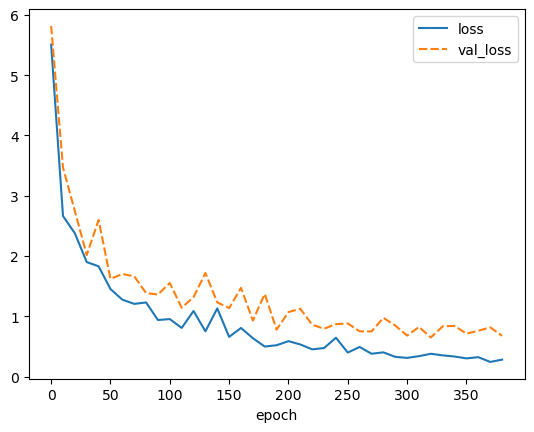

best weights loaded


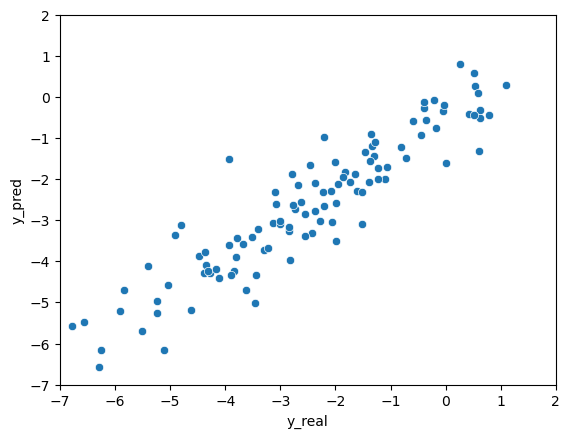

elapsed time: 109.98386359214783
run: 26
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38EA9910>, <torch.utils.data.dataset.Subset object at 0x0000021A38D374C0>, <torch.utils.data.dataset.Subset object at 0x0000021A38D37550>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.437952597935994 | Validation Loss 6.125632286071777
Epoch 10 | Train Loss 4.3443066596984865 | Validation Loss 5.407936334609985
Epoch 20 | Train Loss 3.75092986424764 | Validation Loss 5.041549444198608
Epoch 30 | Train Loss 3.7904963970184324 | Validation Loss 5.036943435668945
Epoch 40 | Train Loss 3.6072768052419026 | Validation Loss 4.799255847930908
Epoch 50 | Train Loss 4.1465978463490805 | Validation Loss 4.553342342376709
Epoch 60 | Train Loss 3.3917278051376343 | Validation Loss 4.52329421043396
Epoch 70 | Train Loss 3.3386818408966064 | Validation Loss 4.68997597694397
Epoch 80 | Train Loss 3.3583690802256267 | Validation Loss 4.346559524536133
Epoch 90 | Train Loss 3.065240979194641 | Validation Loss 4.908227920532227
Epoch 100 | Train Loss 2.9610050519307456 | Validation Loss 3.6512147188186646
Epoch 110 | Train Loss 2.6490423957506817 | Validation Loss 3.576023578643799
Epoch 120 | Train Loss 2.5057549158732098 | Validation Loss 3.2507095336914062
E

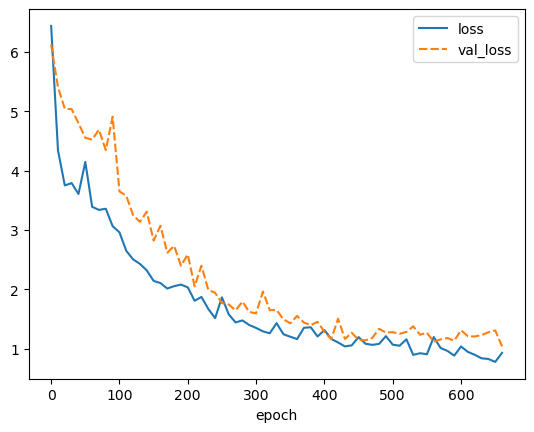

best weights loaded


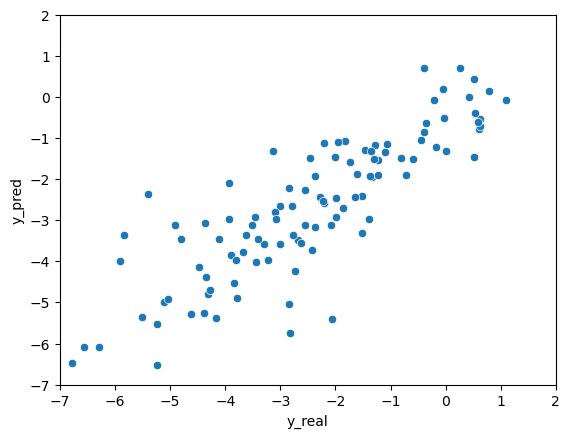

elapsed time: 203.6096739768982
run: 27
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38FD2490>, <torch.utils.data.dataset.Subset object at 0x0000021AD7B6BB80>, <torch.utils.data.dataset.Subset object at 0x0000021AD7B960D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.311168766021728 | Validation Loss 5.789886951446533
Epoch 10 | Train Loss 3.6700515111287433 | Validation Loss 4.670001268386841
Epoch 20 | Train Loss 3.4036917527516684 | Validation Loss 4.137867569923401
Epoch 30 | Train Loss 3.3304007053375244 | Validation Loss 4.610471487045288
Epoch 40 | Train Loss 2.6696754693984985 | Validation Loss 2.9961774349212646
Epoch 50 | Train Loss 2.175820318857829 | Validation Loss 2.8477730751037598
Epoch 60 | Train Loss 2.2351699193318684 | Validation Loss 2.639483094215393
Epoch 70 | Train Loss 2.1577821811040243 | Validation Loss 2.6345741748809814
Epoch 80 | Train Loss 2.517615858713786 | Validation Loss 2.8338788747787476
Epoch 90 | Train Loss 2.0037472089131674 | Validation Loss 2.154998779296875
Epoch 100 | Train Loss 1.598246177037557 | Validation Loss 1.905611515045166
Epoch 110 | Train Loss 2.0395575284957888 | Validation Loss 2.973183751106262
Epoch 120 | Train Loss 1.2745878020922343 | Validation Loss 1.6739621758460

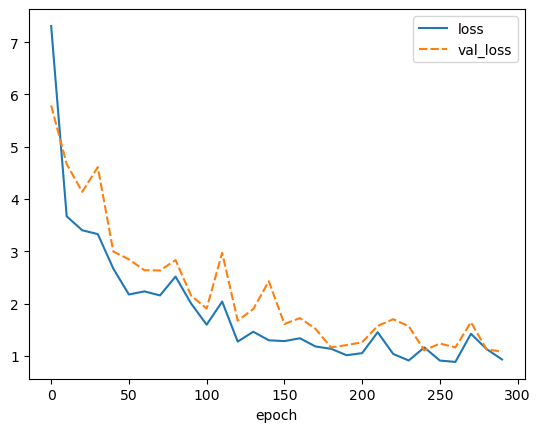

best weights loaded


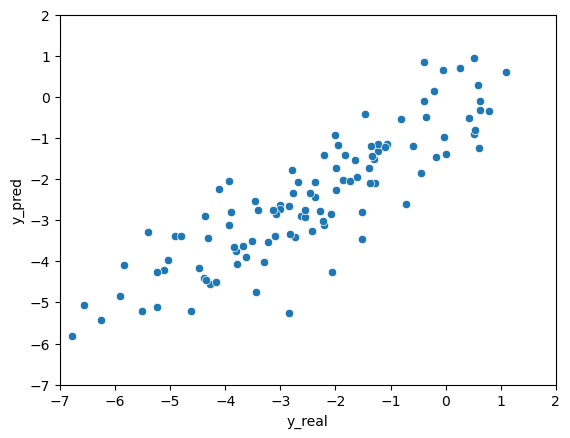

elapsed time: 90.17754745483398
run: 28
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A0F42B0>, <torch.utils.data.dataset.Subset object at 0x0000021A38C43040>, <torch.utils.data.dataset.Subset object at 0x0000021A38C433D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.318788210550943 | Validation Loss 7.041975498199463
Epoch 10 | Train Loss 3.633870840072632 | Validation Loss 5.155327320098877
Epoch 20 | Train Loss 2.875860102971395 | Validation Loss 3.885174036026001
Epoch 30 | Train Loss 2.4502755324045817 | Validation Loss 3.1971373558044434
Epoch 40 | Train Loss 2.3676002343495686 | Validation Loss 3.167171597480774
Epoch 50 | Train Loss 2.0771562417348224 | Validation Loss 2.7492752075195312
Epoch 60 | Train Loss 1.9072552084922791 | Validation Loss 2.418042838573456
Epoch 70 | Train Loss 2.061970273653666 | Validation Loss 2.866532325744629
Epoch 80 | Train Loss 1.9303396224975586 | Validation Loss 2.1698553562164307
Epoch 90 | Train Loss 1.5501542448997498 | Validation Loss 1.8013604879379272
Epoch 100 | Train Loss 1.9945153792699177 | Validation Loss 1.9106758832931519
Epoch 110 | Train Loss 1.235406502087911 | Validation Loss 1.590724527835846
Epoch 120 | Train Loss 1.317568657795588 | Validation Loss 1.64704722166061

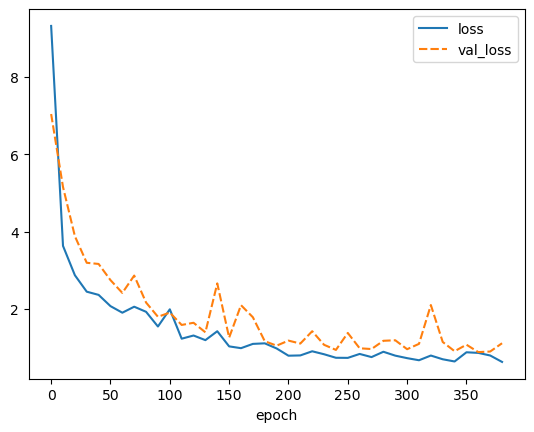

best weights loaded


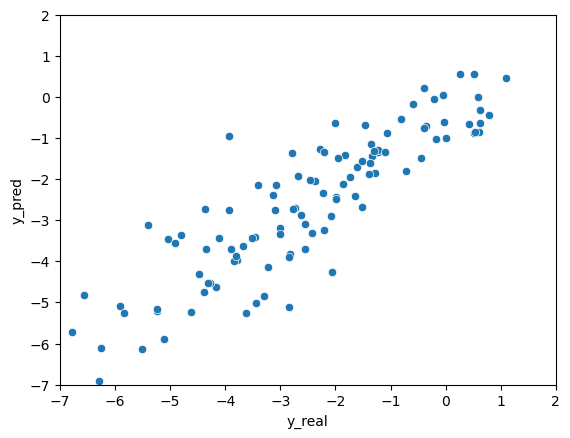

elapsed time: 116.21334505081177
run: 29
{'hidden_channels_list': [256], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38F7A520>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CCC070>, <torch.utils.data.dataset.Subset object at 0x0000021AD7CCC520>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 256)
    (1-3): 3 x GCNConv(256, 256)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=256, out_features=1, bias=True)
)
Number of parameters:  200193


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 11.056444644927979 | Validation Loss 9.855886936187744
Epoch 10 | Train Loss 3.848241901397705 | Validation Loss 4.871048927307129
Epoch 20 | Train Loss 3.7636099020640055 | Validation Loss 4.213176131248474
Epoch 30 | Train Loss 2.7548734108606974 | Validation Loss 3.663348913192749
Epoch 40 | Train Loss 2.5529793898264566 | Validation Loss 3.1016383171081543
Epoch 50 | Train Loss 2.0808674653371173 | Validation Loss 2.5926320552825928
Epoch 60 | Train Loss 1.856061832110087 | Validation Loss 2.300117015838623
Epoch 70 | Train Loss 1.8669379631678262 | Validation Loss 2.0479397773742676
Epoch 80 | Train Loss 1.618489106496175 | Validation Loss 2.6284433603286743
Epoch 90 | Train Loss 1.679544981320699 | Validation Loss 1.9650303721427917
Epoch 100 | Train Loss 1.614792784055074 | Validation Loss 1.9413372874259949
Epoch 110 | Train Loss 1.3916814883550008 | Validation Loss 1.7269028425216675
Epoch 120 | Train Loss 1.2697573184967041 | Validation Loss 1.64749729633

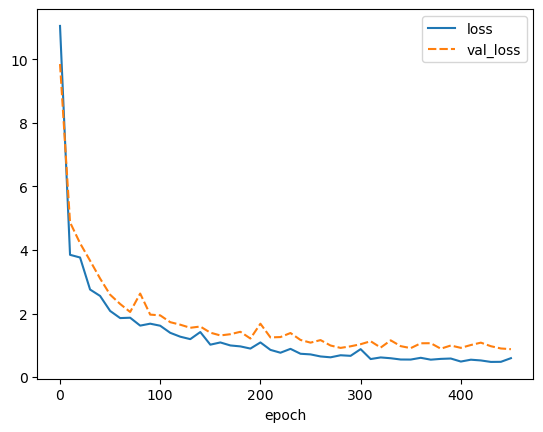

best weights loaded


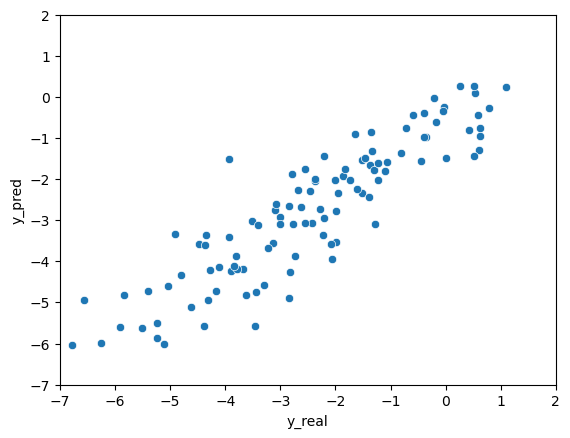

elapsed time: 145.03155636787415
run: 30
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38E4CD60>, <torch.utils.data.dataset.Subset object at 0x0000021AD78FE4C0>, <torch.utils.data.dataset.Subset object at 0x0000021AD78FEEE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.401682647069295 | Validation Loss 5.7468531131744385
Epoch 10 | Train Loss 3.1920467376708985 | Validation Loss 3.9646596908569336
Epoch 20 | Train Loss 2.2508060455322267 | Validation Loss 2.6085855960845947
Epoch 30 | Train Loss 2.7452379067738852 | Validation Loss 3.1956899166107178
Epoch 40 | Train Loss 1.4454450567563375 | Validation Loss 1.5323888063430786
Epoch 50 | Train Loss 1.4570743958155314 | Validation Loss 1.490146517753601
Epoch 60 | Train Loss 1.470652731259664 | Validation Loss 1.6530059576034546
Epoch 70 | Train Loss 0.969604512055715 | Validation Loss 1.2515971064567566
Epoch 80 | Train Loss 1.0876604676246644 | Validation Loss 1.3142025768756866
Epoch 90 | Train Loss 0.7546653668085734 | Validation Loss 0.973468154668808
Epoch 100 | Train Loss 0.690604054927826 | Validation Loss 1.2256737351417542
Epoch 110 | Train Loss 0.6601840694745381 | Validation Loss 1.2060733437538147
Epoch 120 | Train Loss 0.6583245555559795 | Validation Loss 1.3255379

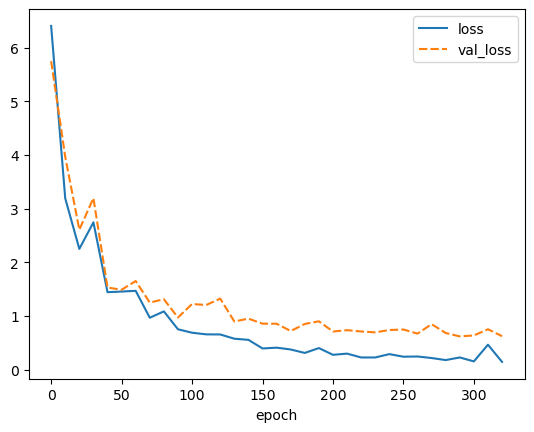

best weights loaded


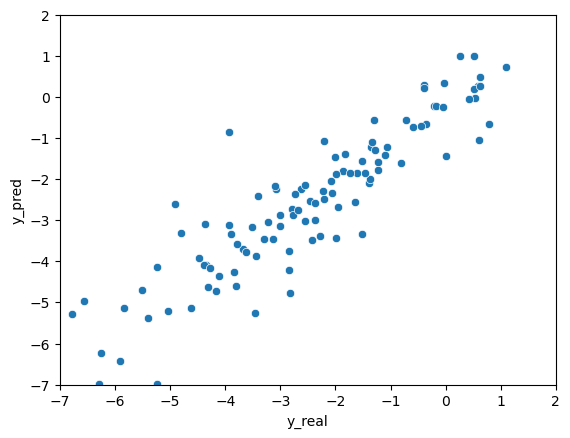

elapsed time: 106.02391123771667
run: 31
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD79E4310>, <torch.utils.data.dataset.Subset object at 0x0000021A718110D0>, <torch.utils.data.dataset.Subset object at 0x0000021A718115E0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.762307771046957 | Validation Loss 5.633078575134277
Epoch 10 | Train Loss 4.055224545796713 | Validation Loss 5.137157917022705
Epoch 20 | Train Loss 3.8415501435597736 | Validation Loss 5.3553855419158936
Epoch 30 | Train Loss 3.973881165186564 | Validation Loss 4.982053160667419
Epoch 40 | Train Loss 3.551440461476644 | Validation Loss 5.518364667892456
Epoch 50 | Train Loss 3.8449203809102377 | Validation Loss 4.9598212242126465
Epoch 60 | Train Loss 3.5632994333902994 | Validation Loss 4.520505905151367
Epoch 70 | Train Loss 3.4886646906534833 | Validation Loss 4.51193904876709
Epoch 80 | Train Loss 3.5727294286092124 | Validation Loss 4.293048143386841
Epoch 90 | Train Loss 3.3580578168233237 | Validation Loss 4.155938148498535
Epoch 100 | Train Loss 3.025521930058797 | Validation Loss 3.8215818405151367
Epoch 110 | Train Loss 2.7039634466171263 | Validation Loss 3.294509530067444
Epoch 120 | Train Loss 2.730355228980382 | Validation Loss 3.4783341884613037


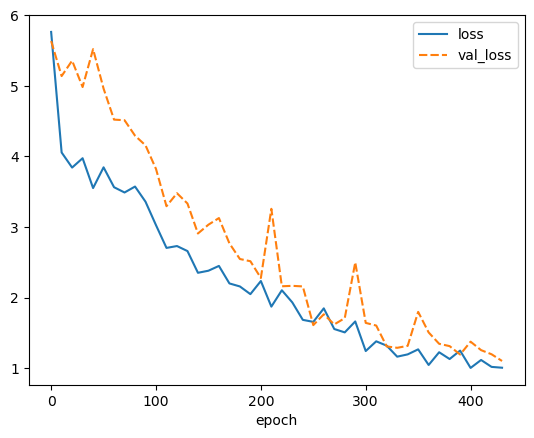

best weights loaded


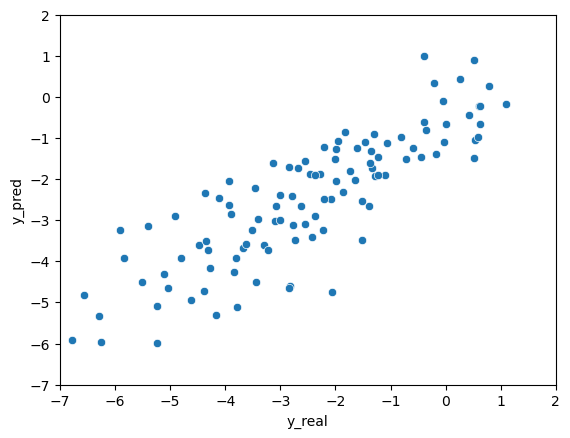

elapsed time: 157.72957968711853
run: 32
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD79E4220>, <torch.utils.data.dataset.Subset object at 0x0000021A3A035490>, <torch.utils.data.dataset.Subset object at 0x0000021A3A035E80>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.465367905298868 | Validation Loss 6.8254358768463135
Epoch 10 | Train Loss 3.7500783920288088 | Validation Loss 5.233186960220337
Epoch 20 | Train Loss 3.6097256739934287 | Validation Loss 4.620518445968628
Epoch 30 | Train Loss 3.4047776540120442 | Validation Loss 3.868111252784729
Epoch 40 | Train Loss 3.1427645842234293 | Validation Loss 3.6555076837539673
Epoch 50 | Train Loss 2.7929627736409506 | Validation Loss 2.8770519495010376
Epoch 60 | Train Loss 2.5410255273183187 | Validation Loss 2.850464344024658
Epoch 70 | Train Loss 2.254241156578064 | Validation Loss 2.842497229576111
Epoch 80 | Train Loss 1.9995056788126628 | Validation Loss 3.2583272457122803
Epoch 90 | Train Loss 1.726439396540324 | Validation Loss 1.965898871421814
Epoch 100 | Train Loss 1.688490923245748 | Validation Loss 1.7849767208099365
Epoch 110 | Train Loss 1.66365225315094 | Validation Loss 1.687156319618225
Epoch 120 | Train Loss 1.9028159936269124 | Validation Loss 1.80989480018615

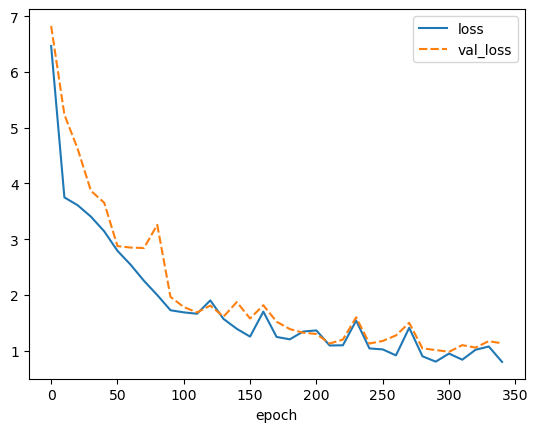

best weights loaded


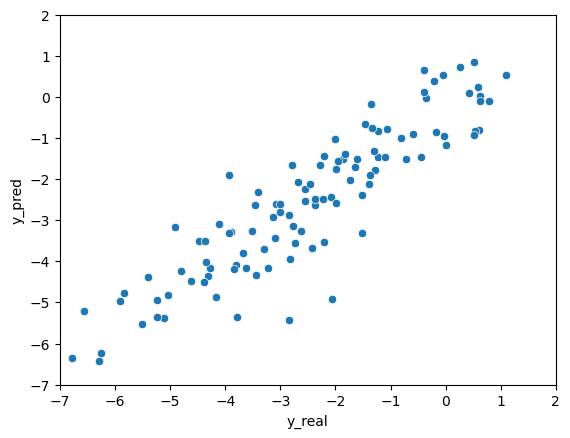

elapsed time: 132.83833122253418
run: 33
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A0D43D0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7E560A0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7E56490>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.900114250183106 | Validation Loss 8.260706901550293
Epoch 10 | Train Loss 3.8962481657663983 | Validation Loss 4.646128416061401
Epoch 20 | Train Loss 3.8177528540293375 | Validation Loss 4.656018018722534
Epoch 30 | Train Loss 2.5206740617752077 | Validation Loss 2.963167190551758
Epoch 40 | Train Loss 2.2869022687276206 | Validation Loss 2.993876576423645
Epoch 50 | Train Loss 1.8947632749875387 | Validation Loss 2.287821352481842
Epoch 60 | Train Loss 1.9489901304244994 | Validation Loss 2.194959044456482
Epoch 70 | Train Loss 1.7732546091079713 | Validation Loss 2.4031559824943542
Epoch 80 | Train Loss 1.7752934098243713 | Validation Loss 2.489805579185486
Epoch 90 | Train Loss 1.664802610874176 | Validation Loss 1.7282812595367432
Epoch 100 | Train Loss 1.5115928173065185 | Validation Loss 2.0964152812957764
Epoch 110 | Train Loss 1.4307300051053364 | Validation Loss 1.7130668759346008
Epoch 120 | Train Loss 1.236739957332611 | Validation Loss 1.396388232707

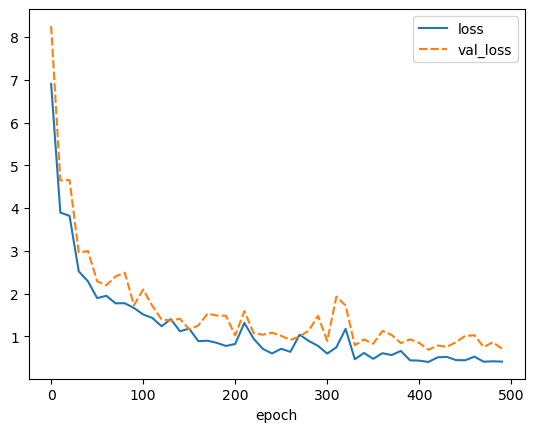

best weights loaded


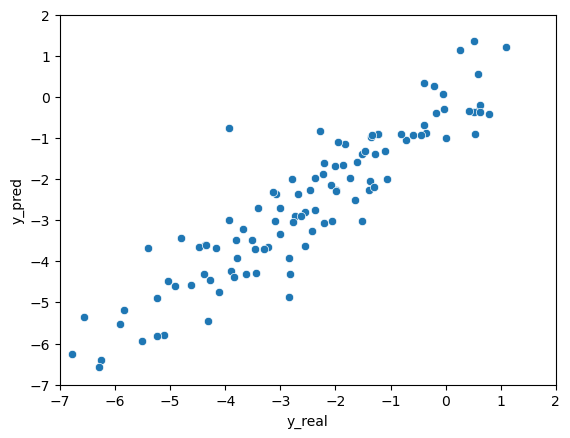

elapsed time: 183.21114826202393
run: 34
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38DBC5B0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92AA5E0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92AAA60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 8.61531753540039 | Validation Loss 5.640535593032837
Epoch 10 | Train Loss 3.971286074320475 | Validation Loss 4.767797946929932
Epoch 20 | Train Loss 3.7464526017506916 | Validation Loss 4.3200836181640625
Epoch 30 | Train Loss 2.9271407683690387 | Validation Loss 3.4570558071136475
Epoch 40 | Train Loss 2.313345257441203 | Validation Loss 3.3427302837371826
Epoch 50 | Train Loss 1.8468321482340495 | Validation Loss 2.0976698994636536
Epoch 60 | Train Loss 1.517947006225586 | Validation Loss 1.7281695008277893
Epoch 70 | Train Loss 1.4507294019063315 | Validation Loss 2.1910146474838257
Epoch 80 | Train Loss 1.2476755499839782 | Validation Loss 2.141944408416748
Epoch 90 | Train Loss 1.3812193473180134 | Validation Loss 1.5554035902023315
Epoch 100 | Train Loss 1.1248061895370483 | Validation Loss 1.4074048399925232
Epoch 110 | Train Loss 1.1324278791745503 | Validation Loss 1.5001954436302185
Epoch 120 | Train Loss 1.0726743777592977 | Validation Loss 1.356706261

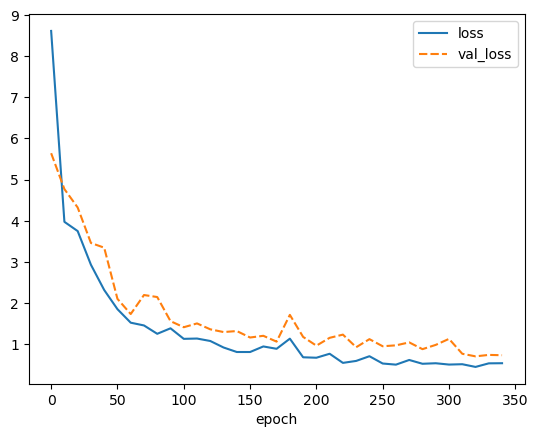

best weights loaded


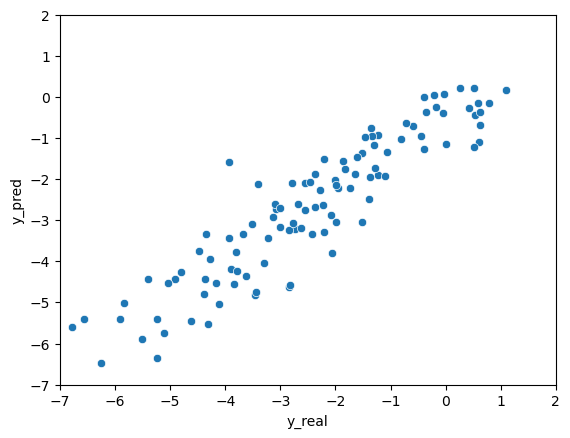

elapsed time: 121.57279109954834
run: 35
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38E1C070>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BDAD90>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BDAD60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.760352849960327 | Validation Loss 5.52717661857605
Epoch 10 | Train Loss 3.948870865503947 | Validation Loss 4.315300941467285
Epoch 20 | Train Loss 2.928288968404134 | Validation Loss 2.9545434713363647
Epoch 30 | Train Loss 2.164275558789571 | Validation Loss 3.051205635070801
Epoch 40 | Train Loss 1.6913719177246094 | Validation Loss 1.926426112651825
Epoch 50 | Train Loss 1.542149273554484 | Validation Loss 2.1168513894081116
Epoch 60 | Train Loss 1.652686389287313 | Validation Loss 1.6871097087860107
Epoch 70 | Train Loss 1.2085986216862996 | Validation Loss 1.7599501013755798
Epoch 80 | Train Loss 1.4054488341013591 | Validation Loss 1.4232820868492126
Epoch 90 | Train Loss 1.2836119929949443 | Validation Loss 1.4367884397506714
Epoch 100 | Train Loss 0.9821882605552673 | Validation Loss 1.6062269806861877
Epoch 110 | Train Loss 1.3024988492329916 | Validation Loss 1.5359997153282166
Epoch 120 | Train Loss 0.9406193296114603 | Validation Loss 1.108869224786

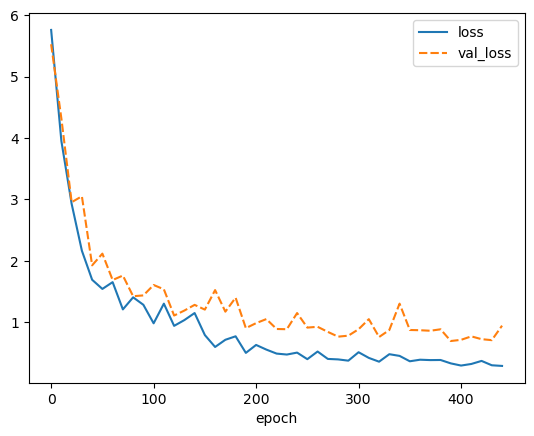

best weights loaded


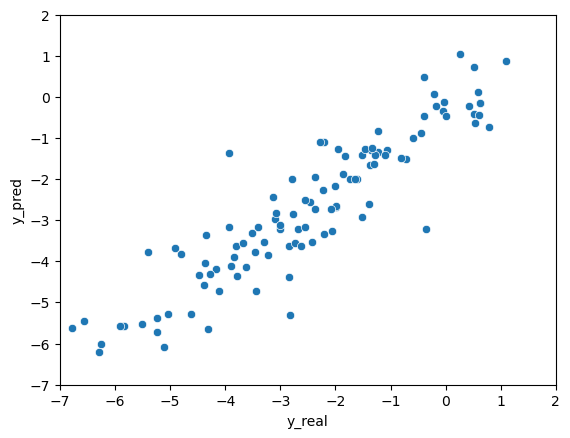

elapsed time: 140.22171545028687
run: 36
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD79DC8E0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92CE8E0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92CEDF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.240463240941366 | Validation Loss 6.253636360168457
Epoch 10 | Train Loss 4.644535175959269 | Validation Loss 5.430835247039795
Epoch 20 | Train Loss 4.012038938204447 | Validation Loss 5.701613068580627
Epoch 30 | Train Loss 3.785962724685669 | Validation Loss 4.699385166168213
Epoch 40 | Train Loss 3.5902990023295085 | Validation Loss 4.634582877159119
Epoch 50 | Train Loss 3.637450853983561 | Validation Loss 4.935844421386719
Epoch 60 | Train Loss 3.6689666112264 | Validation Loss 4.650559425354004
Epoch 70 | Train Loss 3.5570818106333415 | Validation Loss 4.86299204826355
Epoch 80 | Train Loss 3.5318986256917317 | Validation Loss 4.61618959903717
Epoch 90 | Train Loss 3.2426681598027547 | Validation Loss 4.2622987031936646
Epoch 100 | Train Loss 3.1054617961247764 | Validation Loss 4.149235844612122
Epoch 110 | Train Loss 2.856423290570577 | Validation Loss 3.534307837486267
Epoch 120 | Train Loss 3.135282786687215 | Validation Loss 4.335258483886719
Epoch 13

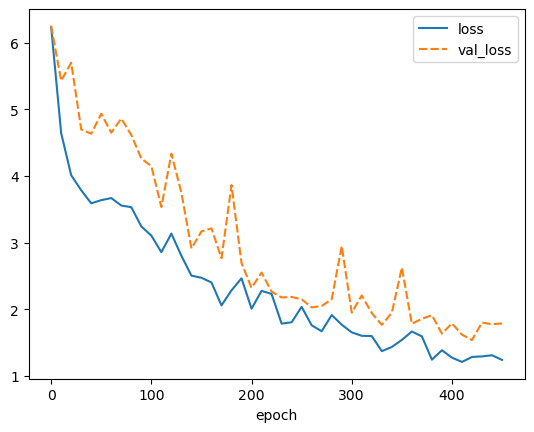

best weights loaded


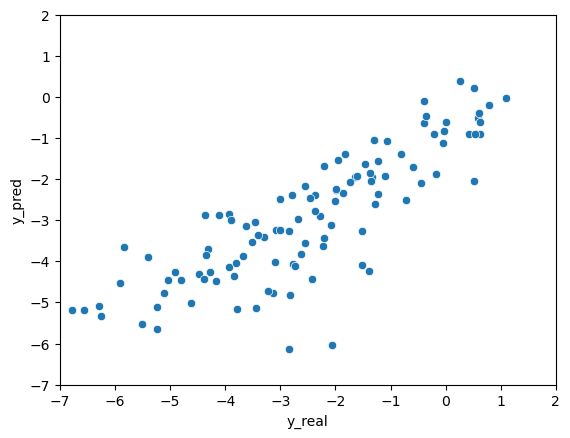

elapsed time: 171.31249570846558
run: 37
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38B24E80>, <torch.utils.data.dataset.Subset object at 0x0000021A38D16B20>, <torch.utils.data.dataset.Subset object at 0x0000021A38D16190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.927262131373087 | Validation Loss 5.809207916259766
Epoch 10 | Train Loss 4.380804411570231 | Validation Loss 5.457419157028198
Epoch 20 | Train Loss 3.9953866163889566 | Validation Loss 4.5995378494262695
Epoch 30 | Train Loss 3.6978450775146485 | Validation Loss 4.609011173248291
Epoch 40 | Train Loss 2.8708701292673746 | Validation Loss 3.6733018159866333
Epoch 50 | Train Loss 2.5587069034576415 | Validation Loss 2.754790425300598
Epoch 60 | Train Loss 2.590358098347982 | Validation Loss 3.6083627939224243
Epoch 70 | Train Loss 2.2914668401082356 | Validation Loss 2.653127670288086
Epoch 80 | Train Loss 1.765335488319397 | Validation Loss 2.3379263877868652
Epoch 90 | Train Loss 1.611117148399353 | Validation Loss 2.619828224182129
Epoch 100 | Train Loss 1.6730360070864359 | Validation Loss 1.8257313966751099
Epoch 110 | Train Loss 1.5972538391749065 | Validation Loss 1.7147684693336487
Epoch 120 | Train Loss 1.4020219484965006 | Validation Loss 1.903063476085

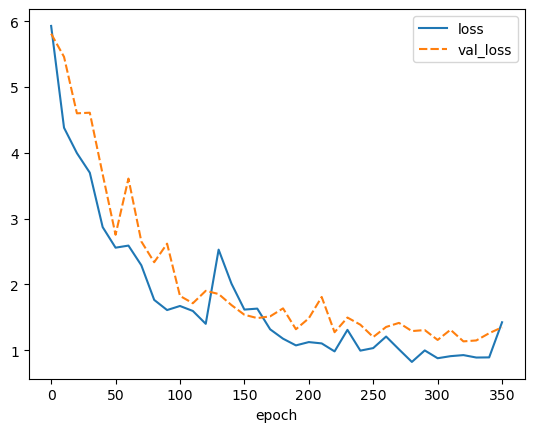

best weights loaded


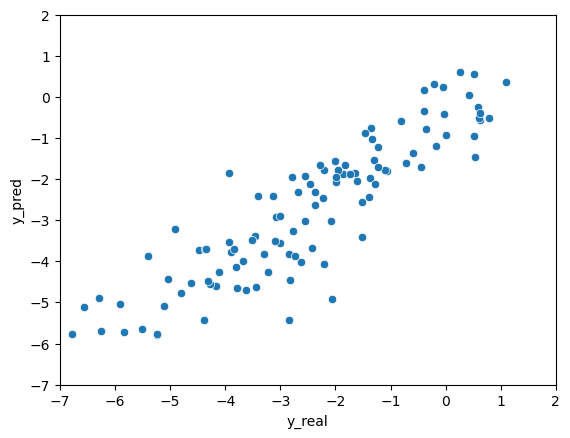

elapsed time: 131.24888610839844
run: 38
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A00A340>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D43D30>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D4C280>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.2488238175710045 | Validation Loss 6.471581697463989
Epoch 10 | Train Loss 3.9913949330647784 | Validation Loss 4.888029336929321
Epoch 20 | Train Loss 3.4843934853871663 | Validation Loss 4.065291166305542
Epoch 30 | Train Loss 2.8915357033411664 | Validation Loss 3.003835916519165
Epoch 40 | Train Loss 2.552367647488912 | Validation Loss 4.269846439361572
Epoch 50 | Train Loss 2.1543089230855306 | Validation Loss 2.2535239458084106
Epoch 60 | Train Loss 2.5646811008453367 | Validation Loss 2.228080630302429
Epoch 70 | Train Loss 1.6011220117410023 | Validation Loss 2.0103690028190613
Epoch 80 | Train Loss 1.6025165875752767 | Validation Loss 2.1484909057617188
Epoch 90 | Train Loss 1.8745128870010377 | Validation Loss 1.8068411946296692
Epoch 100 | Train Loss 1.4000152031580606 | Validation Loss 1.610249400138855
Epoch 110 | Train Loss 1.174334740638733 | Validation Loss 1.5650098323822021
Epoch 120 | Train Loss 1.0531877477963765 | Validation Loss 1.5325675606

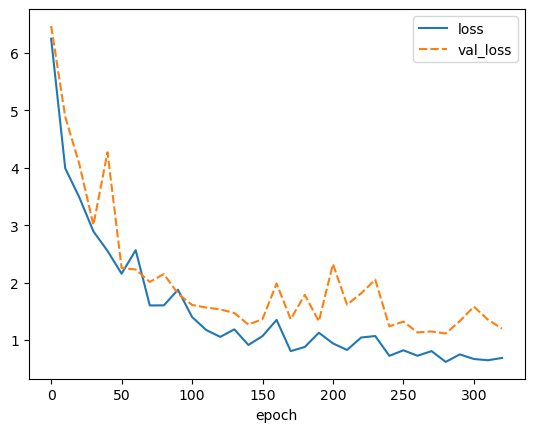

best weights loaded


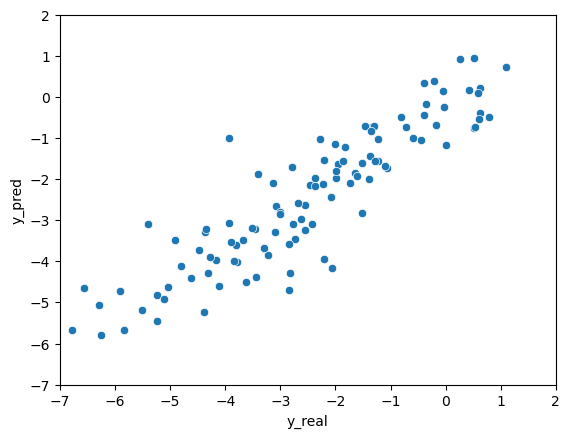

elapsed time: 119.12177515029907
run: 39
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7B22430>, <torch.utils.data.dataset.Subset object at 0x0000021AD67C8490>, <torch.utils.data.dataset.Subset object at 0x0000021AD67C8190>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 11.380934302012125 | Validation Loss 8.028462409973145
Epoch 10 | Train Loss 4.100597874323527 | Validation Loss 5.257954835891724
Epoch 20 | Train Loss 3.9548718770345053 | Validation Loss 5.055134057998657
Epoch 30 | Train Loss 3.361931896209717 | Validation Loss 5.886228799819946
Epoch 40 | Train Loss 2.7844112634658815 | Validation Loss 3.3403124809265137
Epoch 50 | Train Loss 2.311110432942708 | Validation Loss 2.627924084663391
Epoch 60 | Train Loss 2.185529371102651 | Validation Loss 2.6802256107330322
Epoch 70 | Train Loss 2.1263501087824506 | Validation Loss 3.456552743911743
Epoch 80 | Train Loss 1.80211288134257 | Validation Loss 3.7541407346725464
Epoch 90 | Train Loss 1.5055696924527486 | Validation Loss 1.8092128038406372
Epoch 100 | Train Loss 1.54496724208196 | Validation Loss 2.831967830657959
Epoch 110 | Train Loss 1.4113842884699503 | Validation Loss 1.9572169184684753
Epoch 120 | Train Loss 1.2164447108904521 | Validation Loss 2.043890655040741


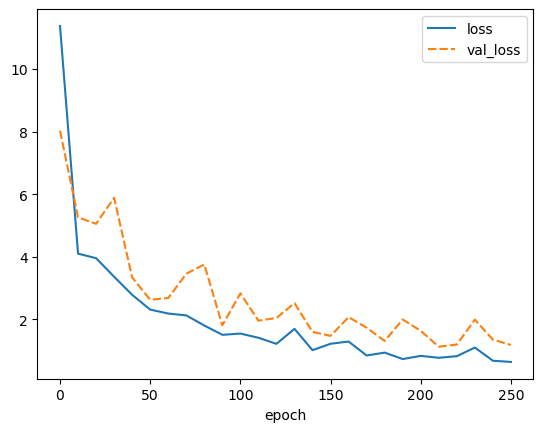

best weights loaded


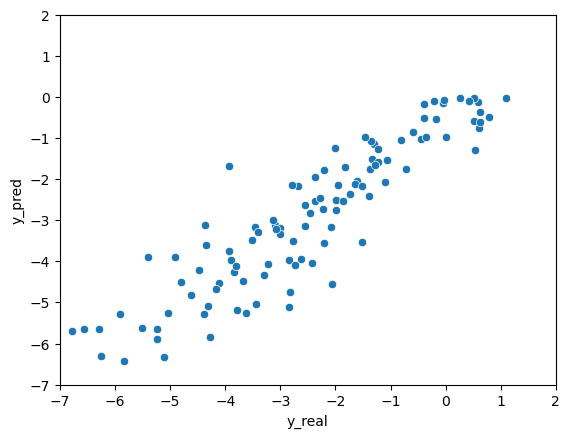

elapsed time: 91.14947748184204
run: 40
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7A41850>, <torch.utils.data.dataset.Subset object at 0x0000021AD92D16D0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92D1BE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.623321072260539 | Validation Loss 5.471957206726074
Epoch 10 | Train Loss 3.3405545790990194 | Validation Loss 3.609029769897461
Epoch 20 | Train Loss 2.262018382549286 | Validation Loss 2.9226523637771606
Epoch 30 | Train Loss 1.6289889574050904 | Validation Loss 2.0367674231529236
Epoch 40 | Train Loss 1.5145723164081573 | Validation Loss 1.7318925857543945
Epoch 50 | Train Loss 1.1857136408487956 | Validation Loss 1.399633765220642
Epoch 60 | Train Loss 1.117727760473887 | Validation Loss 1.2172704339027405
Epoch 70 | Train Loss 0.8882288376490275 | Validation Loss 1.2465803623199463
Epoch 80 | Train Loss 0.8514699141184489 | Validation Loss 1.0976823270320892
Epoch 90 | Train Loss 0.8992544492085774 | Validation Loss 1.0454479157924652
Epoch 100 | Train Loss 0.7599942882855734 | Validation Loss 1.2123328745365143
Epoch 110 | Train Loss 0.6301422715187073 | Validation Loss 1.2576627731323242
Epoch 120 | Train Loss 0.6333775003751119 | Validation Loss 0.9418628

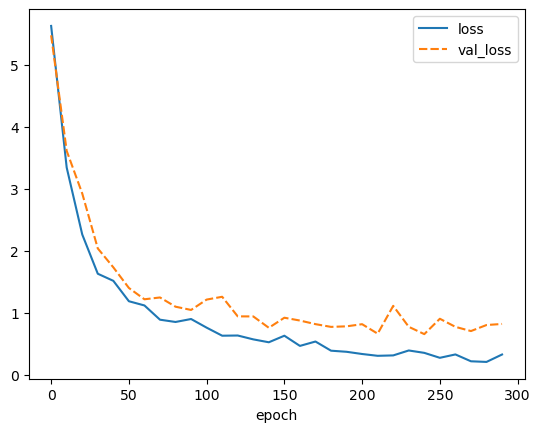

best weights loaded


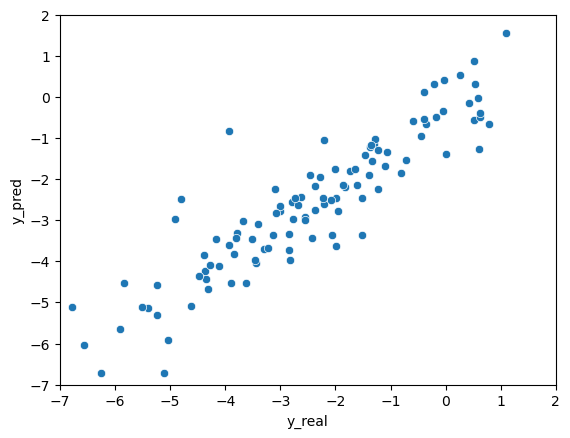

elapsed time: 96.86104273796082
run: 41
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD79F4D60>, <torch.utils.data.dataset.Subset object at 0x0000021AD66BD340>, <torch.utils.data.dataset.Subset object at 0x0000021AD66BDC70>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.126291179656983 | Validation Loss 5.694978475570679
Epoch 10 | Train Loss 4.388946994145711 | Validation Loss 6.340255975723267
Epoch 20 | Train Loss 3.996015930175781 | Validation Loss 4.891693115234375
Epoch 30 | Train Loss 3.6913344065348306 | Validation Loss 4.647610664367676
Epoch 40 | Train Loss 3.604665414492289 | Validation Loss 5.509208917617798
Epoch 50 | Train Loss 3.3910203516483306 | Validation Loss 4.427923917770386
Epoch 60 | Train Loss 3.3802390535672506 | Validation Loss 4.54866361618042
Epoch 70 | Train Loss 3.4795389493306477 | Validation Loss 4.420515298843384
Epoch 80 | Train Loss 3.307029946645101 | Validation Loss 4.286225080490112
Epoch 90 | Train Loss 3.0166150788466135 | Validation Loss 4.039079546928406
Epoch 100 | Train Loss 3.0754950523376463 | Validation Loss 3.5550509691238403
Epoch 110 | Train Loss 2.641597843170166 | Validation Loss 3.463069200515747
Epoch 120 | Train Loss 2.7161332607269286 | Validation Loss 3.6361188888549805
Ep

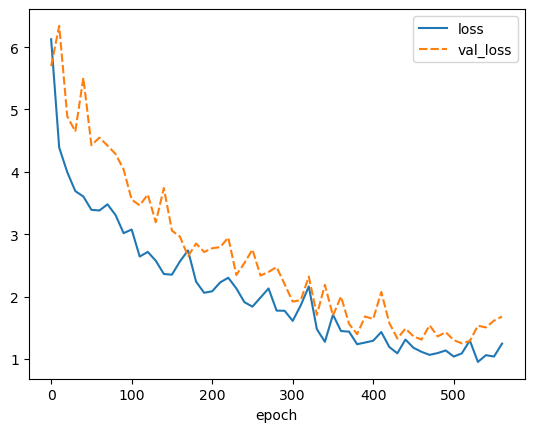

best weights loaded


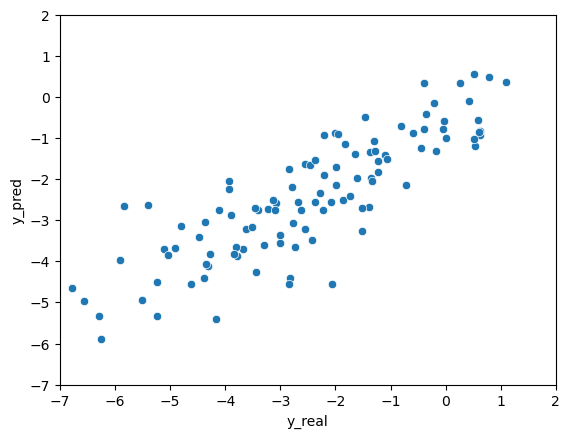

elapsed time: 210.0467758178711
run: 42
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7AC91C0>, <torch.utils.data.dataset.Subset object at 0x0000021AD783FCD0>, <torch.utils.data.dataset.Subset object at 0x0000021AD783FBB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.682635426521301 | Validation Loss 5.665752172470093
Epoch 10 | Train Loss 3.8973800977071127 | Validation Loss 5.400869369506836
Epoch 20 | Train Loss 3.3080108642578123 | Validation Loss 6.479595899581909
Epoch 30 | Train Loss 3.118387309710185 | Validation Loss 3.8569523096084595
Epoch 40 | Train Loss 2.4927103479703265 | Validation Loss 3.0326215028762817
Epoch 50 | Train Loss 2.58837898572286 | Validation Loss 4.466086149215698
Epoch 60 | Train Loss 2.4591728846232095 | Validation Loss 3.7623549699783325
Epoch 70 | Train Loss 2.040344230333964 | Validation Loss 2.4420182704925537
Epoch 80 | Train Loss 2.2828757921854654 | Validation Loss 3.0408371686935425
Epoch 90 | Train Loss 1.892931087811788 | Validation Loss 2.4246948957443237
Epoch 100 | Train Loss 1.9589040279388428 | Validation Loss 2.0943201780319214
Epoch 110 | Train Loss 1.8143498659133912 | Validation Loss 2.034731388092041
Epoch 120 | Train Loss 1.863914974530538 | Validation Loss 2.3382135629653

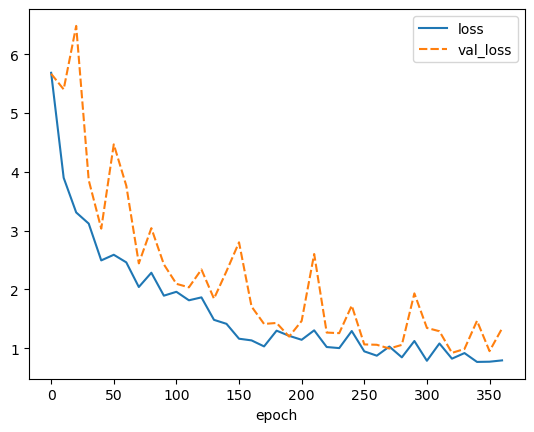

best weights loaded


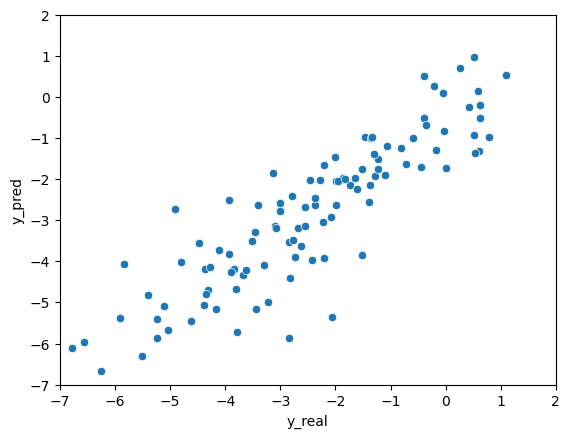

elapsed time: 126.19616556167603
run: 43
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD78D4190>, <torch.utils.data.dataset.Subset object at 0x0000021AD78C2C70>, <torch.utils.data.dataset.Subset object at 0x0000021AD78C2850>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.208058818181356 | Validation Loss 6.574121713638306
Epoch 10 | Train Loss 3.566948080062866 | Validation Loss 5.0459067821502686
Epoch 20 | Train Loss 3.3926188945770264 | Validation Loss 3.621707797050476
Epoch 30 | Train Loss 2.715287439028422 | Validation Loss 3.433943033218384
Epoch 40 | Train Loss 2.2863168001174925 | Validation Loss 2.90509295463562
Epoch 50 | Train Loss 2.327610898017883 | Validation Loss 3.3784295320510864
Epoch 60 | Train Loss 1.9899558067321776 | Validation Loss 2.7396793365478516
Epoch 70 | Train Loss 1.783406639099121 | Validation Loss 2.06124484539032
Epoch 80 | Train Loss 1.7547504266103109 | Validation Loss 2.0172059535980225
Epoch 90 | Train Loss 1.8772918383280437 | Validation Loss 2.0472283363342285
Epoch 100 | Train Loss 1.8344297965367635 | Validation Loss 1.9893382787704468
Epoch 110 | Train Loss 1.8390775203704834 | Validation Loss 1.7635816931724548
Epoch 120 | Train Loss 1.4119062900543213 | Validation Loss 1.8621827960014

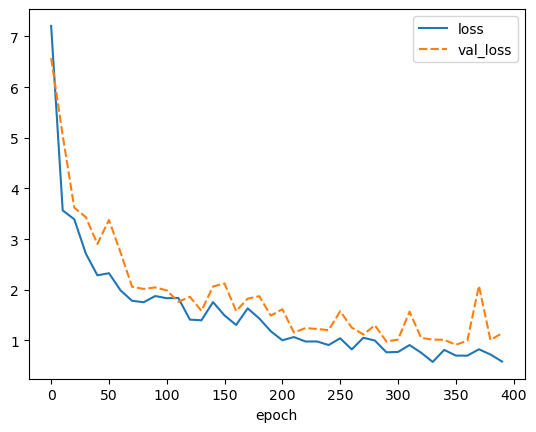

best weights loaded


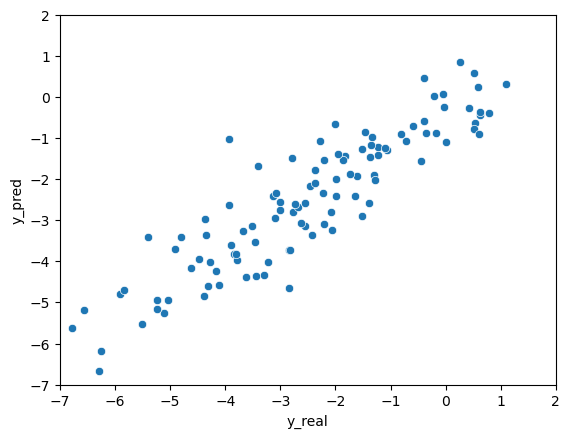

elapsed time: 135.85819268226624
run: 44
{'hidden_channels_list': [512], 'linear_sizes_list': [], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7865B50>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C08940>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C08E20>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.880865502357484 | Validation Loss 7.441307783126831
Epoch 10 | Train Loss 3.9421501477559406 | Validation Loss 4.642707824707031
Epoch 20 | Train Loss 3.522333192825317 | Validation Loss 4.0925915241241455
Epoch 30 | Train Loss 3.030801216761271 | Validation Loss 3.2293922901153564
Epoch 40 | Train Loss 2.5004615147908527 | Validation Loss 2.5493890047073364
Epoch 50 | Train Loss 1.8587253093719482 | Validation Loss 2.1987775564193726
Epoch 60 | Train Loss 1.5385952909787497 | Validation Loss 2.174340009689331
Epoch 70 | Train Loss 1.4437223354975381 | Validation Loss 1.7130576372146606
Epoch 80 | Train Loss 1.3870613296826682 | Validation Loss 1.5710297226905823
Epoch 90 | Train Loss 1.361631202697754 | Validation Loss 2.0098119378089905
Epoch 100 | Train Loss 1.4723007520039877 | Validation Loss 2.5620709657669067
Epoch 110 | Train Loss 1.1206767439842225 | Validation Loss 1.5753942728042603
Epoch 120 | Train Loss 1.3514760335286458 | Validation Loss 1.99805295

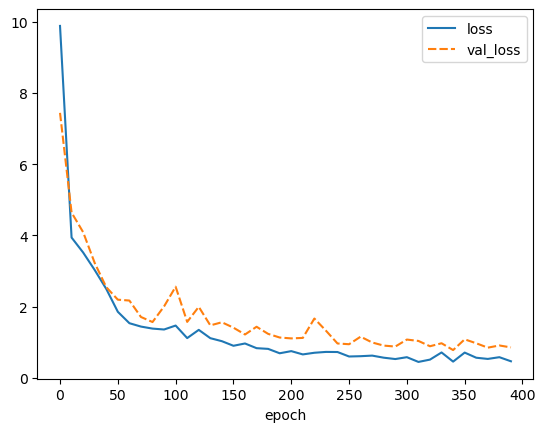

best weights loaded


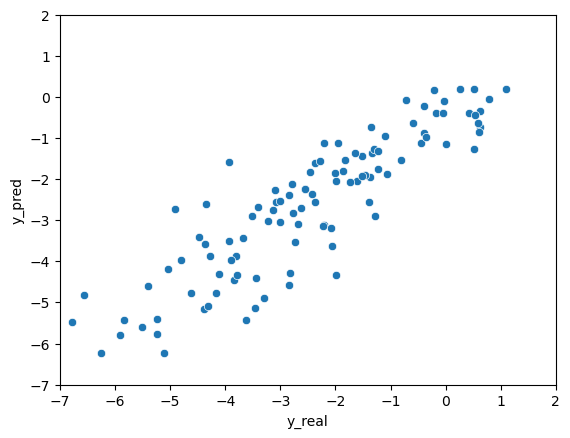

elapsed time: 133.90935683250427
run: 45
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD78EBAC0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7AD4880>, <torch.utils.data.dataset.Subset object at 0x0000021A38D16130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.7184715112050375 | Validation Loss 5.64716100692749
Epoch 10 | Train Loss 3.252027893066406 | Validation Loss 4.411484718322754
Epoch 20 | Train Loss 1.9478222688039144 | Validation Loss 2.694375991821289
Epoch 30 | Train Loss 1.6604636907577515 | Validation Loss 2.2746795415878296
Epoch 40 | Train Loss 1.630035972595215 | Validation Loss 1.4896257519721985
Epoch 50 | Train Loss 1.1694718758265177 | Validation Loss 1.348052203655243
Epoch 60 | Train Loss 1.0807212551434835 | Validation Loss 1.4952220916748047
Epoch 70 | Train Loss 0.9796463052431742 | Validation Loss 1.4290019273757935
Epoch 80 | Train Loss 0.9887574195861817 | Validation Loss 1.9885889887809753
Epoch 90 | Train Loss 0.8656812270482381 | Validation Loss 1.079574704170227
Epoch 100 | Train Loss 0.7537437200546264 | Validation Loss 1.277686983346939
Epoch 110 | Train Loss 0.5631745566924413 | Validation Loss 1.070308655500412
Epoch 120 | Train Loss 0.5242331703503926 | Validation Loss 0.97244077920

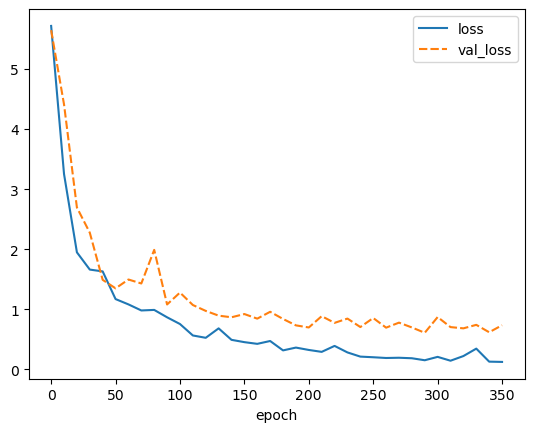

best weights loaded


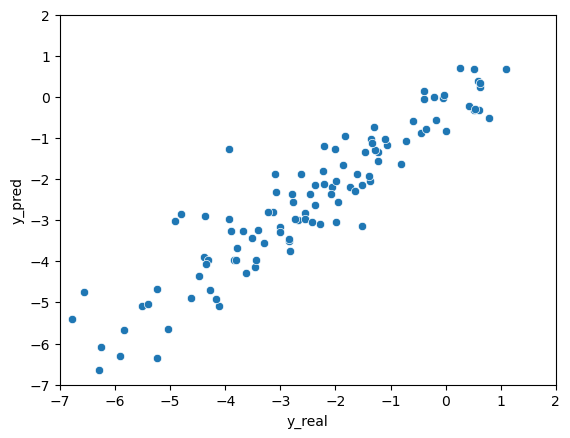

elapsed time: 117.30253410339355
run: 46
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38E8C5E0>, <torch.utils.data.dataset.Subset object at 0x0000021AD926D6D0>, <torch.utils.data.dataset.Subset object at 0x0000021AD926DBE0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.695327885945638 | Validation Loss 6.133383274078369
Epoch 10 | Train Loss 4.043725943565368 | Validation Loss 5.4104485511779785
Epoch 20 | Train Loss 3.8513425668080647 | Validation Loss 5.105013370513916
Epoch 30 | Train Loss 3.531297556559245 | Validation Loss 5.040297508239746
Epoch 40 | Train Loss 3.45696173508962 | Validation Loss 4.511817216873169
Epoch 50 | Train Loss 3.572380224863688 | Validation Loss 4.651072263717651
Epoch 60 | Train Loss 3.5721494356791177 | Validation Loss 4.806766986846924
Epoch 70 | Train Loss 3.619011147816976 | Validation Loss 4.417774677276611
Epoch 80 | Train Loss 3.300876251856486 | Validation Loss 4.813145160675049
Epoch 90 | Train Loss 3.4779604117075604 | Validation Loss 5.0300657749176025
Epoch 100 | Train Loss 2.832795254389445 | Validation Loss 3.7076966762542725
Epoch 110 | Train Loss 2.6618323802947996 | Validation Loss 3.4674437046051025
Epoch 120 | Train Loss 2.762195841471354 | Validation Loss 4.071272611618042
Epo

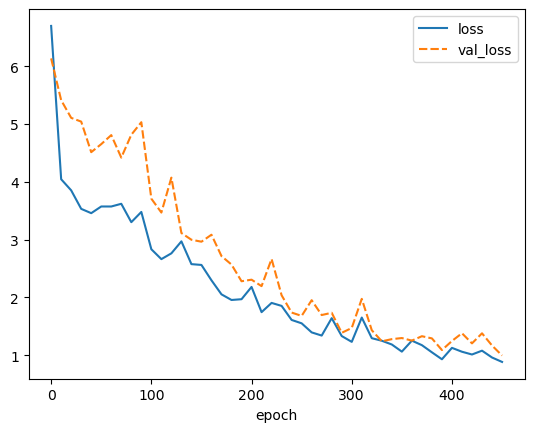

best weights loaded


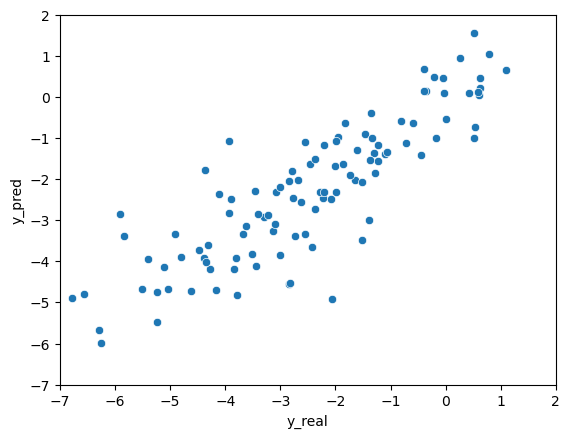

elapsed time: 163.5448033809662
run: 47
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD794F070>, <torch.utils.data.dataset.Subset object at 0x0000021A38EA36A0>, <torch.utils.data.dataset.Subset object at 0x0000021A3A04B5B0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.497385835647583 | Validation Loss 5.975059986114502
Epoch 10 | Train Loss 3.6924694061279295 | Validation Loss 5.458681583404541
Epoch 20 | Train Loss 3.5371970812479656 | Validation Loss 4.598420143127441
Epoch 30 | Train Loss 3.2464738210042317 | Validation Loss 4.118518948554993
Epoch 40 | Train Loss 2.407700045903524 | Validation Loss 4.058459043502808
Epoch 50 | Train Loss 2.362505086263021 | Validation Loss 2.6989415884017944
Epoch 60 | Train Loss 2.2078242619832356 | Validation Loss 2.9090464115142822
Epoch 70 | Train Loss 2.4090661923090617 | Validation Loss 2.5161091089248657
Epoch 80 | Train Loss 2.0164164900779724 | Validation Loss 2.081160545349121
Epoch 90 | Train Loss 1.7451267957687377 | Validation Loss 2.1994208097457886
Epoch 100 | Train Loss 1.7631383895874024 | Validation Loss 2.6964941024780273
Epoch 110 | Train Loss 1.5725219964981079 | Validation Loss 2.0228363275527954
Epoch 120 | Train Loss 1.6511495033899943 | Validation Loss 2.8852964639

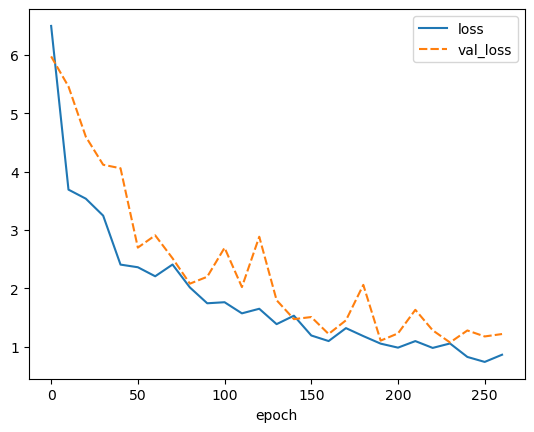

best weights loaded


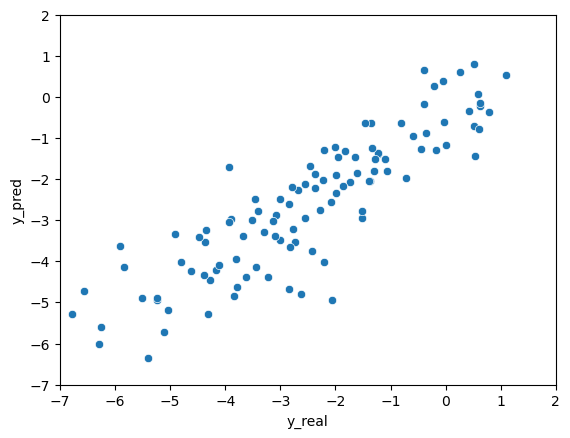

elapsed time: 88.27400779724121
run: 48
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7A41730>, <torch.utils.data.dataset.Subset object at 0x0000021AD79C2850>, <torch.utils.data.dataset.Subset object at 0x0000021AD79C2D60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.760716358820598 | Validation Loss 7.115495443344116
Epoch 10 | Train Loss 3.880683263142904 | Validation Loss 4.537484645843506
Epoch 20 | Train Loss 3.1645322839419046 | Validation Loss 3.6869744062423706
Epoch 30 | Train Loss 2.4163254817326862 | Validation Loss 3.6273010969161987
Epoch 40 | Train Loss 2.5487034877141315 | Validation Loss 3.5860096216201782
Epoch 50 | Train Loss 2.0633446057637532 | Validation Loss 3.6483240127563477
Epoch 60 | Train Loss 1.9737021525700886 | Validation Loss 2.441445827484131
Epoch 70 | Train Loss 1.8083676894505818 | Validation Loss 2.2937248945236206
Epoch 80 | Train Loss 1.9837642749150595 | Validation Loss 2.7211722135543823
Epoch 90 | Train Loss 1.5196534593900044 | Validation Loss 1.841578483581543
Epoch 100 | Train Loss 1.7757561922073364 | Validation Loss 1.6924524903297424
Epoch 110 | Train Loss 1.4899866024653117 | Validation Loss 2.2893264293670654
Epoch 120 | Train Loss 1.8660535573959351 | Validation Loss 2.0518309

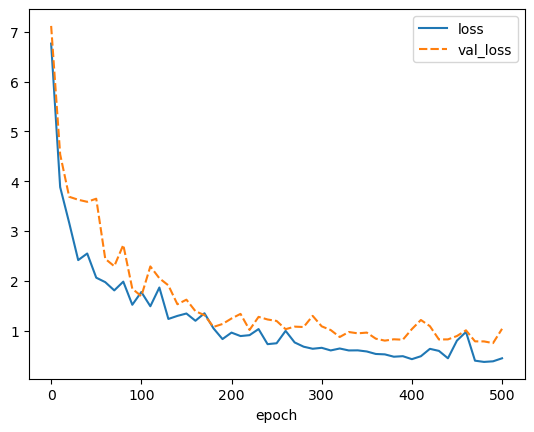

best weights loaded


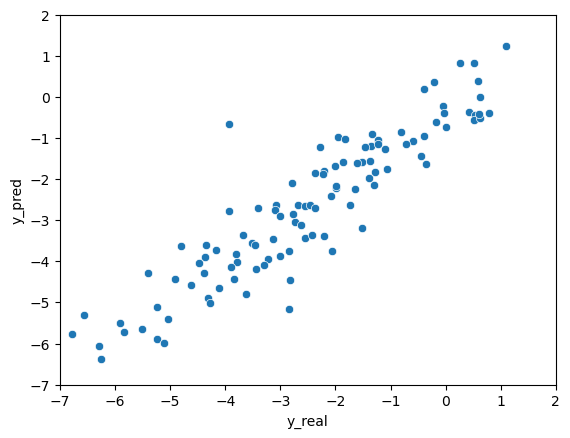

elapsed time: 165.45705819129944
run: 49
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>, <function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38AFA2B0>, <torch.utils.data.dataset.Subset object at 0x0000021AD930B850>, <torch.utils.data.dataset.Subset object at 0x0000021AD930BD60>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=1024, out_features=1, bias=True)
)
Number of parameters:  794113


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.28180128733317 | Validation Loss 7.1339216232299805
Epoch 10 | Train Loss 4.02438702583313 | Validation Loss 4.304494738578796
Epoch 20 | Train Loss 2.8269549210866294 | Validation Loss 4.081715106964111
Epoch 30 | Train Loss 2.4650593280792235 | Validation Loss 2.662488579750061
Epoch 40 | Train Loss 2.453074852625529 | Validation Loss 4.405127048492432
Epoch 50 | Train Loss 1.8161142031351725 | Validation Loss 2.223464846611023
Epoch 60 | Train Loss 2.5789360364278155 | Validation Loss 3.2347896099090576
Epoch 70 | Train Loss 1.7554598490397135 | Validation Loss 1.7343419790267944
Epoch 80 | Train Loss 1.5092679182688395 | Validation Loss 1.7470788359642029
Epoch 90 | Train Loss 1.2883283098538716 | Validation Loss 1.4984370470046997
Epoch 100 | Train Loss 1.5711631099383037 | Validation Loss 2.4965749979019165
Epoch 110 | Train Loss 1.2277755896250406 | Validation Loss 1.3947100639343262
Epoch 120 | Train Loss 1.1910951177279154 | Validation Loss 1.52249956130

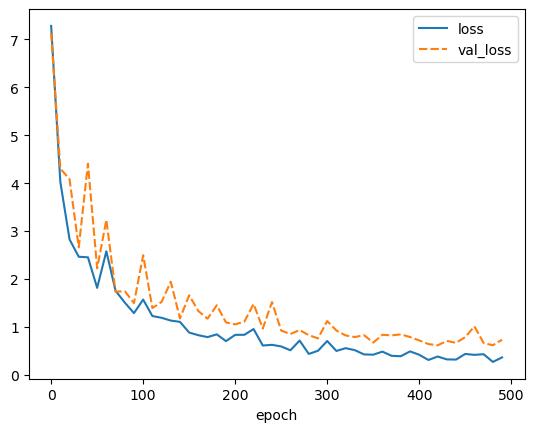

best weights loaded


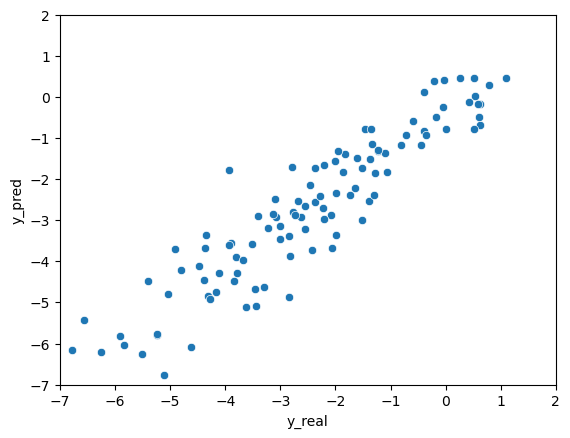

elapsed time: 156.91891145706177
run: 50
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD788DA90>, <torch.utils.data.dataset.Subset object at 0x0000021AD786BBE0>, <torch.utils.data.dataset.Subset object at 0x0000021AD786B6D0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.825018723805745 | Validation Loss 5.613855600357056
Epoch 10 | Train Loss 3.497041432062785 | Validation Loss 4.161207437515259
Epoch 20 | Train Loss 2.4988367239634197 | Validation Loss 2.9619054794311523
Epoch 30 | Train Loss 2.0995914061864216 | Validation Loss 2.5183730125427246
Epoch 40 | Train Loss 2.422986888885498 | Validation Loss 2.1141673922538757
Epoch 50 | Train Loss 1.7674011866251627 | Validation Loss 1.9347177743911743
Epoch 60 | Train Loss 1.387222452958425 | Validation Loss 1.6521201133728027
Epoch 70 | Train Loss 1.138426411151886 | Validation Loss 1.5207785964012146
Epoch 80 | Train Loss 0.9649263064066569 | Validation Loss 2.320944607257843
Epoch 90 | Train Loss 2.254912821451823 | Validation Loss 1.6757442951202393
Epoch 100 | Train Loss 1.416484534740448 | Validation Loss 1.4611032009124756
Epoch 110 | Train Loss 0.8993722359339397 | Validation Loss 1.2897352576255798
Epoch 120 | Train Loss 1.4520862062772115 | Validation Loss 1.27690190076

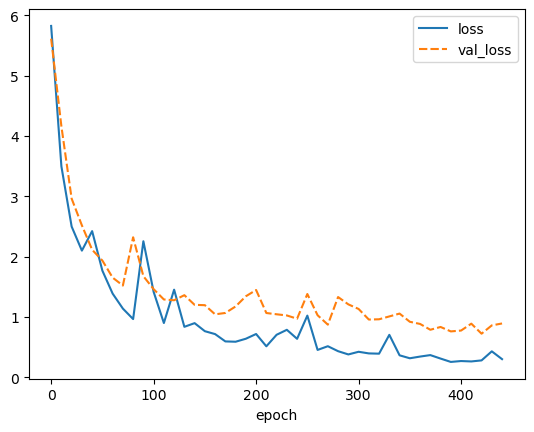

best weights loaded


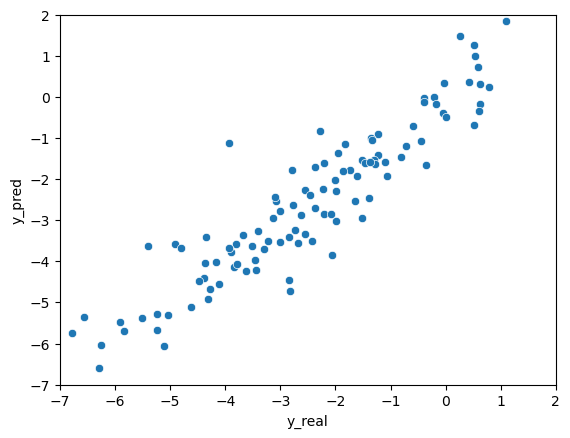

elapsed time: 132.9089391231537
run: 51
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A0AB700>, <torch.utils.data.dataset.Subset object at 0x0000021AD7AFF8B0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7C791F0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 6.085847155253092 | Validation Loss 5.719049453735352
Epoch 10 | Train Loss 4.629683542251587 | Validation Loss 5.430099964141846
Epoch 20 | Train Loss 4.296187496185302 | Validation Loss 4.833622694015503
Epoch 30 | Train Loss 4.042779270807902 | Validation Loss 4.843421220779419
Epoch 40 | Train Loss 3.817290258407593 | Validation Loss 4.614904761314392
Epoch 50 | Train Loss 3.7273206233978273 | Validation Loss 4.787151336669922
Epoch 60 | Train Loss 3.58893784681956 | Validation Loss 4.754514455795288
Epoch 70 | Train Loss 3.8670473734537762 | Validation Loss 5.4251227378845215
Epoch 80 | Train Loss 3.38720965385437 | Validation Loss 4.8222997188568115
Epoch 90 | Train Loss 3.443380268414815 | Validation Loss 4.408630609512329
Epoch 100 | Train Loss 3.1693766593933104 | Validation Loss 4.34894585609436
Epoch 110 | Train Loss 3.1838271617889404 | Validation Loss 3.857612371444702
Epoch 120 | Train Loss 2.7625492731730144 | Validation Loss 4.029726982116699
Epoch 

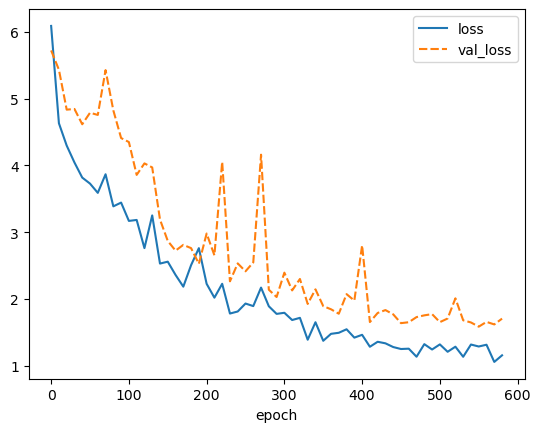

best weights loaded


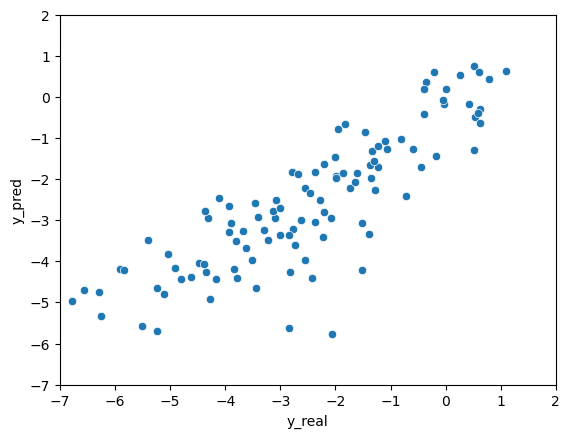

elapsed time: 195.93958592414856
run: 52
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38BFC4C0>, <torch.utils.data.dataset.Subset object at 0x0000021A3A0C3790>, <torch.utils.data.dataset.Subset object at 0x0000021A3A052DF0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 5.7837327798207605 | Validation Loss 5.828668117523193
Epoch 10 | Train Loss 3.903754138946533 | Validation Loss 6.048158407211304
Epoch 20 | Train Loss 3.98016627629598 | Validation Loss 4.4544901847839355
Epoch 30 | Train Loss 3.3291486899058023 | Validation Loss 4.509342789649963
Epoch 40 | Train Loss 2.910282929738363 | Validation Loss 3.2262226343154907
Epoch 50 | Train Loss 2.363998619715373 | Validation Loss 2.8976556062698364
Epoch 60 | Train Loss 2.298767264684041 | Validation Loss 2.806997776031494
Epoch 70 | Train Loss 1.914465077718099 | Validation Loss 2.218966245651245
Epoch 80 | Train Loss 1.9210752487182616 | Validation Loss 2.4989233016967773
Epoch 90 | Train Loss 1.647182575861613 | Validation Loss 1.990902602672577
Epoch 100 | Train Loss 1.6561100244522096 | Validation Loss 2.064163386821747
Epoch 110 | Train Loss 1.4358518024285634 | Validation Loss 1.7525628805160522
Epoch 120 | Train Loss 1.5894341786702475 | Validation Loss 2.045760452747345


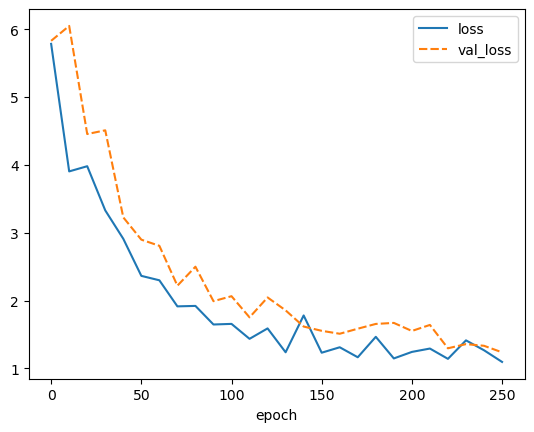

best weights loaded


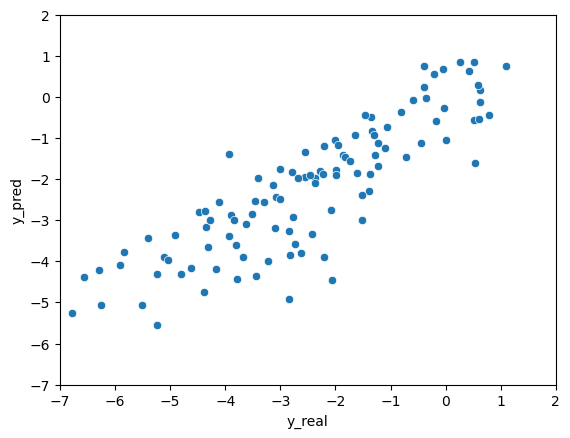

elapsed time: 85.41052150726318
run: 53
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A39FB1100>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D8FAF0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D8FEB0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 7.513675340016683 | Validation Loss 7.249399900436401
Epoch 10 | Train Loss 3.834346389770508 | Validation Loss 5.455103397369385
Epoch 20 | Train Loss 3.3977137724558513 | Validation Loss 4.293339371681213
Epoch 30 | Train Loss 3.2835974375406902 | Validation Loss 3.6120448112487793
Epoch 40 | Train Loss 3.1128808577855427 | Validation Loss 2.6301865577697754
Epoch 50 | Train Loss 2.0501641829808555 | Validation Loss 2.337196946144104
Epoch 60 | Train Loss 1.9614972273508708 | Validation Loss 3.4143428802490234
Epoch 70 | Train Loss 1.6475618263085683 | Validation Loss 2.024949789047241
Epoch 80 | Train Loss 1.675919493039449 | Validation Loss 2.055280327796936
Epoch 90 | Train Loss 1.49268665711085 | Validation Loss 2.5077855587005615
Epoch 100 | Train Loss 1.6499897718429566 | Validation Loss 2.135236442089081
Epoch 110 | Train Loss 1.3077929139137268 | Validation Loss 1.9654834270477295
Epoch 120 | Train Loss 1.3727476755777994 | Validation Loss 1.7100498676300

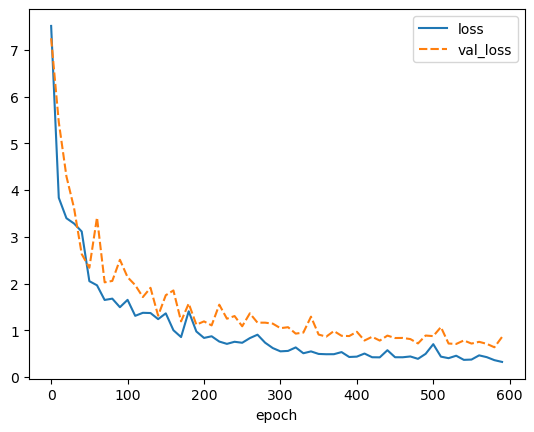

best weights loaded


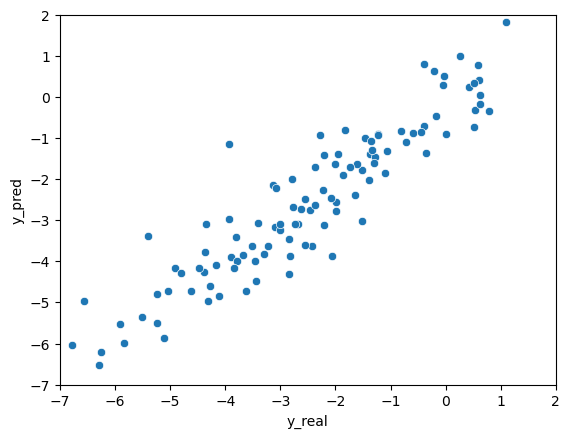

elapsed time: 193.98518753051758
run: 54
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_mean_pool at 0x0000021A35DD1B80>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38C61A60>, <torch.utils.data.dataset.Subset object at 0x0000021AD78A4C70>, <torch.utils.data.dataset.Subset object at 0x0000021A39FEAC10>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


Epoch 0 | Train Loss 8.88107484181722 | Validation Loss 6.566226959228516
Epoch 10 | Train Loss 4.19315234820048 | Validation Loss 5.0127928256988525
Epoch 20 | Train Loss 3.5825737635294597 | Validation Loss 4.479065179824829
Epoch 30 | Train Loss 3.0543298641840617 | Validation Loss 4.8658668994903564
Epoch 40 | Train Loss 2.529383587837219 | Validation Loss 2.8172959089279175
Epoch 50 | Train Loss 2.462494977315267 | Validation Loss 3.07855761051178
Epoch 60 | Train Loss 1.9950226624806722 | Validation Loss 5.014131546020508
Epoch 70 | Train Loss 2.110590346654256 | Validation Loss 2.342220425605774
Epoch 80 | Train Loss 1.5322590192159018 | Validation Loss 1.7340542674064636
Epoch 90 | Train Loss 1.6696563641230264 | Validation Loss 2.248848855495453
Epoch 100 | Train Loss 1.430680787563324 | Validation Loss 2.3875155448913574
Epoch 110 | Train Loss 1.3787902514139811 | Validation Loss 1.568669080734253
Epoch 120 | Train Loss 1.367470105489095 | Validation Loss 1.477309763431549
Ep

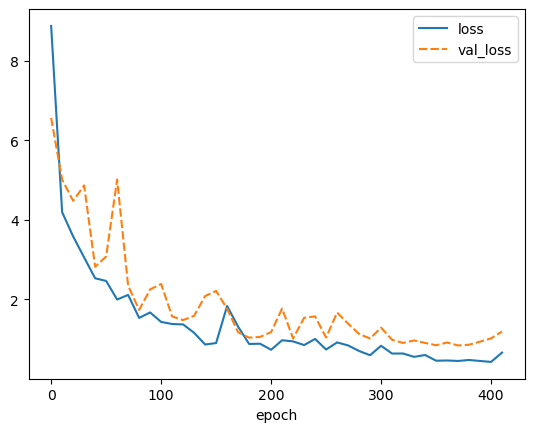

best weights loaded


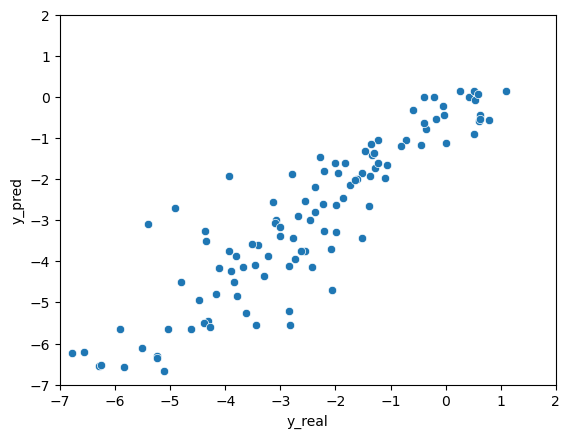

elapsed time: 137.43662524223328
run: 55
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A3A095E20>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D23B50>, <torch.utils.data.dataset.Subset object at 0x0000021AD7D240A0>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.821854464213053 | Validation Loss 5.4249114990234375
Epoch 10 | Train Loss 2.5817044178644815 | Validation Loss 4.338448524475098
Epoch 20 | Train Loss 2.216852060953776 | Validation Loss 3.0631691217422485
Epoch 30 | Train Loss 1.5621697902679443 | Validation Loss 2.183903932571411
Epoch 40 | Train Loss 1.303905200958252 | Validation Loss 2.811544895172119
Epoch 50 | Train Loss 1.4150102138519287 | Validation Loss 1.346317708492279
Epoch 60 | Train Loss 1.343681780497233 | Validation Loss 1.9463297724723816
Epoch 70 | Train Loss 1.001541511217753 | Validation Loss 1.1353108286857605
Epoch 80 | Train Loss 0.9393238623936971 | Validation Loss 1.6301788091659546
Epoch 90 | Train Loss 0.7903921008110046 | Validation Loss 1.14009490609169
Epoch 100 | Train Loss 0.6815972407658895 | Validation Loss 1.0116789937019348
Epoch 110 | Train Loss 1.066782037417094 | Validation Loss 1.1218077540397644
Epoch 120 | Train Loss 0.5949041446050009 | Validation Loss 0.9772165119647

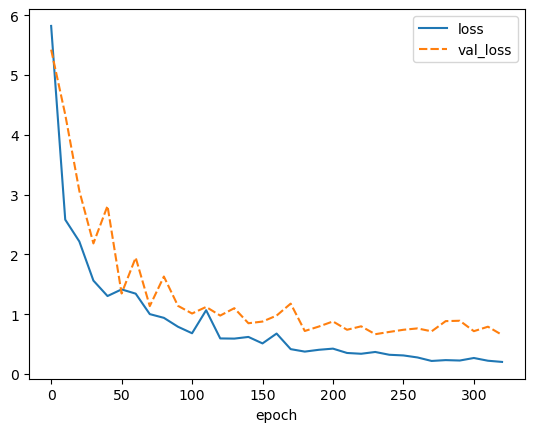

best weights loaded


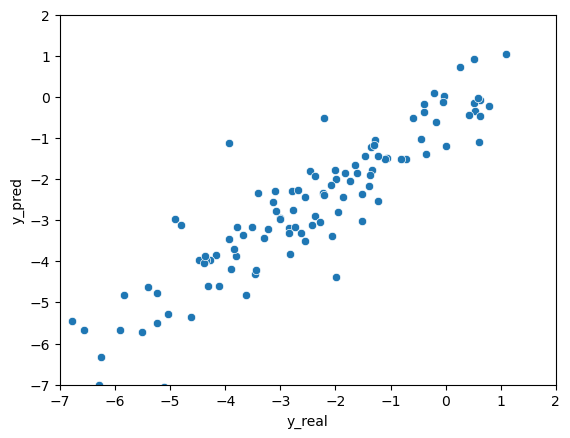

elapsed time: 99.7856764793396
run: 56
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [0], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7938040>, <torch.utils.data.dataset.Subset object at 0x0000021AD672A9A0>, <torch.utils.data.dataset.Subset object at 0x0000021AD672AE50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 5.762596241633097 | Validation Loss 6.159592151641846
Epoch 10 | Train Loss 4.302072691917419 | Validation Loss 5.192944765090942
Epoch 20 | Train Loss 3.823151731491089 | Validation Loss 5.590523719787598
Epoch 30 | Train Loss 3.988020579020182 | Validation Loss 4.735236167907715
Epoch 40 | Train Loss 3.6482123851776125 | Validation Loss 4.787232160568237
Epoch 50 | Train Loss 3.633126147588094 | Validation Loss 4.445626258850098
Epoch 60 | Train Loss 3.3451727787653605 | Validation Loss 4.4255675077438354
Epoch 70 | Train Loss 3.467270294825236 | Validation Loss 4.547935247421265
Epoch 80 | Train Loss 2.9973032057285307 | Validation Loss 4.025377988815308
Epoch 90 | Train Loss 3.043139934539795 | Validation Loss 3.785141348838806
Epoch 100 | Train Loss 2.9247228145599364 | Validation Loss 3.705861449241638
Epoch 110 | Train Loss 2.8580764452616374 | Validation Loss 3.7202972173690796
Epoch 120 | Train Loss 3.002980375289917 | Validation Loss 3.4306344985961914
Ep

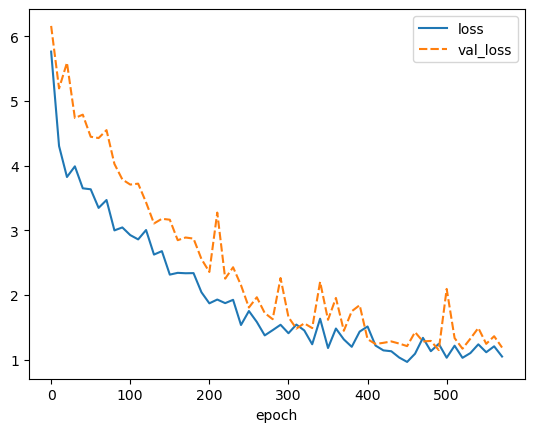

best weights loaded


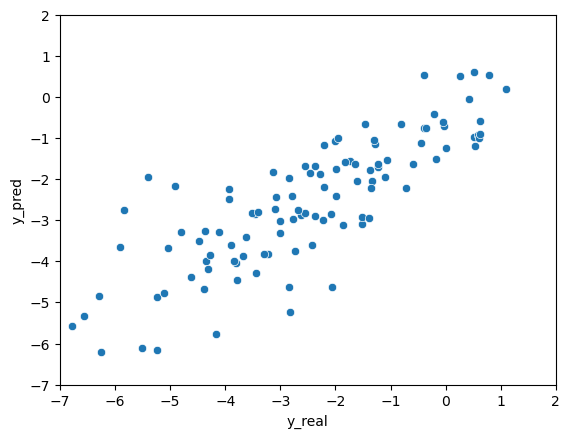

elapsed time: 200.1753067970276
run: 57
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [1], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A38DE11F0>, <torch.utils.data.dataset.Subset object at 0x0000021AD92B5400>, <torch.utils.data.dataset.Subset object at 0x0000021AD92B5E50>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 7.351173718770345 | Validation Loss 6.685518741607666
Epoch 10 | Train Loss 3.7557979742685954 | Validation Loss 4.84639310836792
Epoch 20 | Train Loss 3.791189352671305 | Validation Loss 5.098679542541504
Epoch 30 | Train Loss 3.529000425338745 | Validation Loss 4.511920928955078
Epoch 40 | Train Loss 3.10162836710612 | Validation Loss 3.6350804567337036
Epoch 50 | Train Loss 3.0258305708567304 | Validation Loss 3.7188844680786133
Epoch 60 | Train Loss 2.3409029563268025 | Validation Loss 2.829823851585388
Epoch 70 | Train Loss 1.8827286879221599 | Validation Loss 2.463516592979431
Epoch 80 | Train Loss 2.1910922050476076 | Validation Loss 2.382667064666748
Epoch 90 | Train Loss 1.8808258692423503 | Validation Loss 3.074850916862488
Epoch 100 | Train Loss 1.9010180234909058 | Validation Loss 2.4187427759170532
Epoch 110 | Train Loss 1.5338040192921956 | Validation Loss 2.4552950859069824
Epoch 120 | Train Loss 1.9816999832789104 | Validation Loss 1.786895811557769

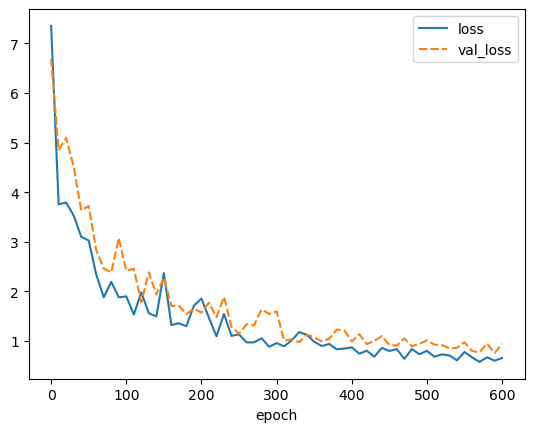

best weights loaded


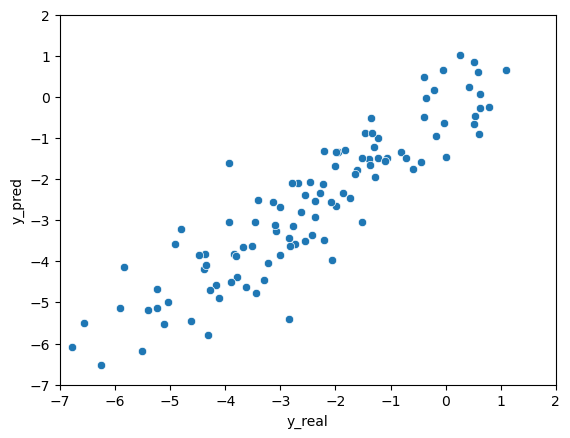

elapsed time: 203.03479766845703
run: 58
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [2], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021A39FFAAF0>, <torch.utils.data.dataset.Subset object at 0x0000021A38C8E1F0>, <torch.utils.data.dataset.Subset object at 0x0000021A38EA3460>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 6.954669984181722 | Validation Loss 6.332284688949585
Epoch 10 | Train Loss 3.441343832015991 | Validation Loss 4.5482072830200195
Epoch 20 | Train Loss 3.1682583967844646 | Validation Loss 3.285521149635315
Epoch 30 | Train Loss 2.890209976832072 | Validation Loss 2.9786062240600586
Epoch 40 | Train Loss 2.0061114728450775 | Validation Loss 3.2635483741760254
Epoch 50 | Train Loss 2.1974276940027875 | Validation Loss 2.8790011405944824
Epoch 60 | Train Loss 2.0462042967478435 | Validation Loss 2.429175853729248
Epoch 70 | Train Loss 1.7066224654515585 | Validation Loss 2.2781158685684204
Epoch 80 | Train Loss 1.8554550886154175 | Validation Loss 2.438405752182007
Epoch 90 | Train Loss 1.7711782693862914 | Validation Loss 2.0873846411705017
Epoch 100 | Train Loss 1.7288747072219848 | Validation Loss 1.7227250337600708
Epoch 110 | Train Loss 2.3331929127375286 | Validation Loss 1.727515697479248
Epoch 120 | Train Loss 1.781408687432607 | Validation Loss 1.7516753077

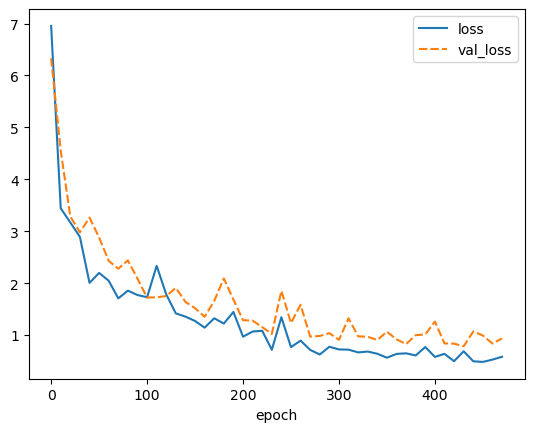

best weights loaded


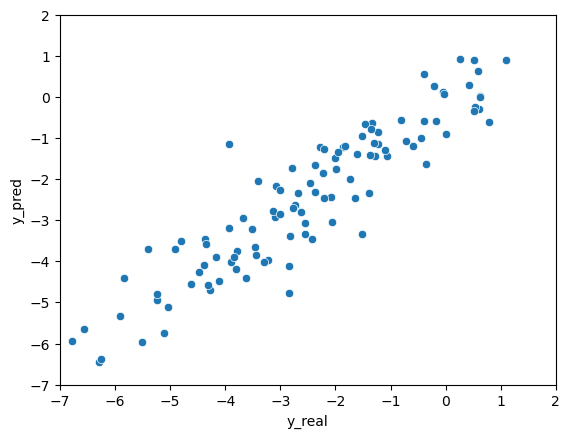

elapsed time: 157.77420163154602
run: 59
{'hidden_channels_list': [512], 'linear_sizes_list': [512], 'gcn_layers_list': 4, 'aggregations_list': [<function global_max_pool at 0x0000021A35DD8550>], 'apply_scaffold_split_list': False, 'permute_layer_list': [3], 'pre_act_permute_gcn_list': False, 'post_act_permute_gcn_list': True}
[<torch.utils.data.dataset.Subset object at 0x0000021AD7AA8CD0>, <torch.utils.data.dataset.Subset object at 0x0000021AD7BF6BE0>, <torch.utils.data.dataset.Subset object at 0x0000021A38D09130>]
GCN_molecule_regression(
  (convs): ModuleList(
    (0): GCNConv(9, 512)
    (1-3): 3 x GCNConv(512, 512)
  )
  (activation1): ReLU()
  (activation2): ReLU()
  (additional_layers): ModuleList()
  (out): Linear(in_features=512, out_features=1, bias=True)
)
Number of parameters:  793601


j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
j:\Anaconda3\envs\newest_dgl\lib\site-packages\torch_geometric\warnings.py:11: UserWarning: The usage of `scatter(reduce='max')` can be accelerated via the 'torch-scatter' package, but it was not found
  warnings.warn(message)


Epoch 0 | Train Loss 9.703003374735514 | Validation Loss 10.49665093421936
Epoch 10 | Train Loss 3.844134823481242 | Validation Loss 4.766851186752319
Epoch 20 | Train Loss 3.3862505594889325 | Validation Loss 5.12665057182312
Epoch 30 | Train Loss 3.013147497177124 | Validation Loss 4.053907036781311
Epoch 40 | Train Loss 2.67409926255544 | Validation Loss 2.899405360221863
Epoch 50 | Train Loss 2.0649272282918294 | Validation Loss 2.420249104499817
Epoch 60 | Train Loss 1.9596695979436238 | Validation Loss 2.3577016592025757
Epoch 70 | Train Loss 1.776720118522644 | Validation Loss 2.0154383182525635
Epoch 80 | Train Loss 1.6479222297668457 | Validation Loss 1.9540259838104248
Epoch 90 | Train Loss 1.6189969420433044 | Validation Loss 1.879477322101593
Epoch 100 | Train Loss 1.566164743900299 | Validation Loss 1.6031854748725891
Epoch 110 | Train Loss 1.2635920166969299 | Validation Loss 1.654388189315796
Epoch 120 | Train Loss 1.3235907475153605 | Validation Loss 1.8770358562469482


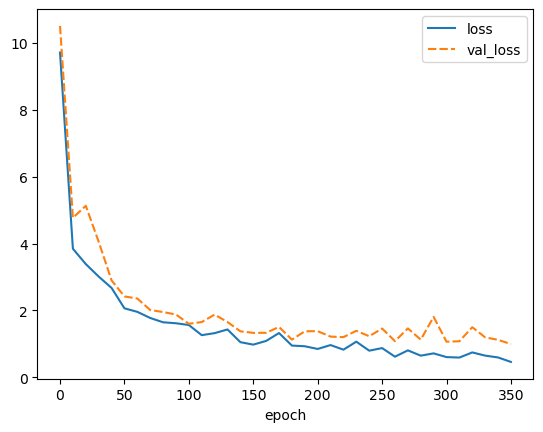

best weights loaded


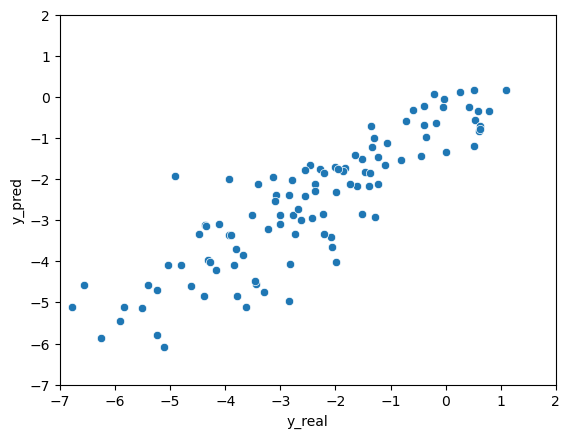

elapsed time: 117.4021999835968


In [13]:
import time

counter = 0
for combination in combinations:
    t0 = time.time()
    print(f"run: {counter}")
    counter = counter + 1
    
    #print(combination)
    combination_dict = dict(zip(keys, combination))
    print(combination_dict)
    

    apply_scaffold_split = combination_dict["apply_scaffold_split_list"]

    if not use_fingerprints:
        hidden_channels=combination_dict["hidden_channels_list"]
        gcn_layers=combination_dict["gcn_layers_list"]
        linear_sizes=combination_dict["linear_sizes_list"]
        aggregations=deepcopy(combination_dict["aggregations_list"])

        permute_index=combination_dict["permute_layer_list"]
        pre_act_permute_gcn=combination_dict["pre_act_permute_gcn_list"]
        post_act_permute_gcn=combination_dict["post_act_permute_gcn_list"]
    else:
        radius = combination_dict["radius"] 
        fpSize = combination_dict["fpSize"]
        linear_layers = combination_dict["linear_layers"] 
        create_count_fp = combination_dict["create_count_fp"] 



    if create_new_data:
        data, data_y = load_esol()

        pytorch_graph_list = create_pytorch_graph(data)

        processed_data = process_pytorch_graph(pytorch_graph_list, data_y)

        train_dataset, test_dataset, val_dataset = create_train_test_graphs(processed_data, train_percentage= 0.8, test_percentage = 0.1, apply_scaffold_split = apply_scaffold_split )
        loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)

    else:

        import dill as pickle

        if apply_scaffold_split:
            loader_file = 'datasets_scaffold_reg_esol.pkl'
        else: 
            loader_file = 'datasets_reg_esol.pkl'
        with open(loader_file, 'rb') as file: 
            
            
            loaders = pickle.load(file) 
        
            print(loaders) 

        train_dataset, test_dataset, val_dataset = loaders


        if use_fingerprints:
            morgan_data_train, morgan_data_test, morgan_data_val = create_fingerprint_sets(datasets=[train_dataset, test_dataset, val_dataset], radius=radius, fpSize = fpSize, create_count_fp = create_count_fp)

            loader = DataLoader(morgan_data_train, 
                                batch_size=batch_size, shuffle=True)
            test_loader = DataLoader(morgan_data_test, 
                                    batch_size=batch_size, shuffle=True)

        else:
            #loader, test_loader = create_dataloader(train_dataset, test_dataset, batch_size=batch_size)
            loader, test_loader, val_loader = create_dataloader_val(train_dataset, test_dataset, val_dataset, batch_size=batch_size)
        

    if not use_fingerprints:
        model, device, optimizer, loss_fn = initialize_regression_model(input_dim=train_dataset.dataset[0].x.shape[-1], hidden_channels=hidden_channels, gcn_layers=gcn_layers, linear_sizes=linear_sizes, aggregations=aggregations, apply_random_aggregations=apply_random_aggregations, learning_rate=learning_rate, permute_index=permute_index, pre_act_permute_gcn=pre_act_permute_gcn, post_act_permute_gcn=post_act_permute_gcn)


        model, best_model_weights, losses, val_losses = regression_train(model, loader, val_loader, device, loss_fn, optimizer, log_time=10, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression(model, test_loader, device, best_model_weights)

    else:

        model, device, optimizer, loss_fn = initialize_regression_model_fingerprint( linear_layers=linear_layers, learning_rate=learning_rate)


        model, best_model_weights, losses, val_losses = regression_train_fingerprint(model, loader, val_loader, device, loss_fn, optimizer, log_time=100, max_epochs=1000, apply_early_stopping = True, early_stopping_patience = 50, finally_plot_losses = True)
        plt.show()
        mean_mse, mean_l1, dfs = predict_regression_fingerprint(model, test_loader, device, best_model_weights)


    plt.show()

    el_time = time.time() - t0
    print(f"elapsed time: {el_time}")
    
    final_df = pd.concat(dfs)
    
    save_dict = dict()

    save_dict["pred_df"] = final_df

    save_dict["el_time"] = el_time

    #regression
    save_dict["mean_mse"] = mean_mse
    save_dict["mean_l1"] = mean_l1

    aggregations_names = [x.__name__ for x in aggregations]

    save_dict["apply_scaffold_split"] = apply_scaffold_split

    if not use_fingerprints:
        save_dict["hidden_channels"] = hidden_channels
        save_dict["gcn_layers"] = gcn_layers
        save_dict["linear_sizes"] = linear_sizes
        save_dict["aggregations"] = aggregations_names

        save_dict["permute_index"] = permute_index
        save_dict["pre_act_permute_gcn"] = pre_act_permute_gcn
        save_dict["post_act_permute_gcn"] = post_act_permute_gcn


    else:
        save_dict["radius"] = radius
        save_dict["fpSize"] = fpSize
        save_dict["linear_layers"] = linear_layers
        save_dict["create_count_fp"] = create_count_fp



    save_dict["apply_random_aggregations"] = apply_random_aggregations
    save_dict["learning_rate"] = learning_rate

    save_dict["model_type"] = model_type
    save_dict["model"] = model

    from os.path import exists
    final_filename = filename_basic
    counter = 1
    while exists(final_filename):
        final_filename = filename_basic + "_" + str(counter)
        counter = counter + 1

    import pickle
    with open(final_filename, 'wb') as handle:
        pickle.dump(save_dict, handle)


    